In [293]:
import pandas as pd
import numpy as np 
import sidetable 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None 
df = pd.read_csv('./datos/data_analyst.csv', index_col = 0)
df.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
32,32,United States of America,Data Analyst,< 1 years,R,A personal computer / desktop,Never,I do not use machine learning methods,NaN,NaN,NaN,R,RStudio,NVIDIA GPUs,Ggplot / ggplot2,NaN,NaN,NaN,NaN,"Google Cloud Datalab,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,46,China,Data Analyst,< 1 years,Python,A personal computer / desktop,2-5 times,1-2 years,No (we do not use ML methods),NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NVIDIA GPUs,"Matplotlib ,Plotly / Plotly Express","Scikit-learn , TensorFlow ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,"Kaggle Notebooks,Azure Notebooks,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Coursera,edX,Kaggle Learn Courses,","Twitter (data science influencers),Kaggle (not..."
66,66,China,Data Analyst,< 1 years,Python,A laptop,Never,< 1 year,I do not know,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"PyCharm , Spyder",None,None,Other,Other,Analyze and understand data to influence produ...,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"None,","Kaggle (notebooks, forums, etc),"
102,102,India,Data Analyst,< 1 years,Python,A laptop,Once,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn , TensorFlow ,Keras ,Xgboost","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,"Azure Notebooks,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Coursera,Kaggle Learn Courses,DataCamp,Udemy,L...","Reddit (r/machinelearning, etc),Kaggle (notebo..."
108,108,Israel,Data Analyst,< 1 years,Python,A personal computer / desktop,Never,I do not use machine learning methods,We use ML methods for generating insights (but...,NaN,"Business intelligence software (Salesforce, Ta...","Python, SQL","Jupyter Notebook, Other",None,"Matplotlib ,Seaborn",NaN,NaN,Analyze and understand data to influence produ...,NaN,"Colab Notebooks,",NaN,NaN,"None,",NaN,NaN,"No / None,",NaN,NaN,NaN,NaN,"Coursera,LinkedIn Learning,","Kaggle (notebooks, forums, etc),Blogs (Towards..."


In [294]:
df['q6'].unique()

array(['< 1 years', 'I have never written code'], dtype=object)

In [295]:
df_q10=df['q10'].reset_index()
df_q10

,index,q10
0,32,"Google Cloud Datalab,"
1,46,"Kaggle Notebooks,Azure Notebooks,"
2,66,Other
3,102,"Azure Notebooks,"
4,108,"Colab Notebooks,"
...,...,...
746,25811,"None,"
747,25819,"None,"
748,25909,"None,"
749,25916,Other


In [296]:

def quitar_comillas (col):
        try:
            return col.split(',')
        except:
            np.nan

In [297]:
df_q10['q10'] = df_q10['q10'].apply(quitar_comillas)

In [298]:
df_10_explode = df_q10['q10'].explode().reset_index()

In [299]:
df_10_explode

,index,q10
0,0,Google Cloud Datalab
1,0,
2,1,Kaggle Notebooks
3,1,Azure Notebooks
4,1,
...,...,...
1592,748,None
1593,748,
1594,749,Other
1595,750,Binder / JupyterHub


In [300]:
df_10_explode['q10'].unique()

array(['Google Cloud Datalab', '', ' Kaggle Notebooks', 'Azure Notebooks',
       'Other', 'Colab Notebooks', 'None', ' Amazon EMR Notebooks ',
       'Google Cloud Notebooks (AI Platform / Vertex AI) ',
       ' Databricks Collaborative Notebooks ', None,
       ' Amazon Sagemaker Studio Notebooks ', ' Binder / JupyterHub ',
       ' IBM Watson Studio ', ' Observable Notebooks ',
       ' Zeppelin / Zepl Notebooks ', ' Deepnote Notebooks ',
       ' Paperspace / Gradient ', ' Code Ocean '], dtype=object)

In [301]:
gb = df_10_explode.groupby('q10').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [302]:
df_q10 = gb.reset_index(name='count')

In [303]:
df_q10.drop(0, axis= 0,inplace=True)

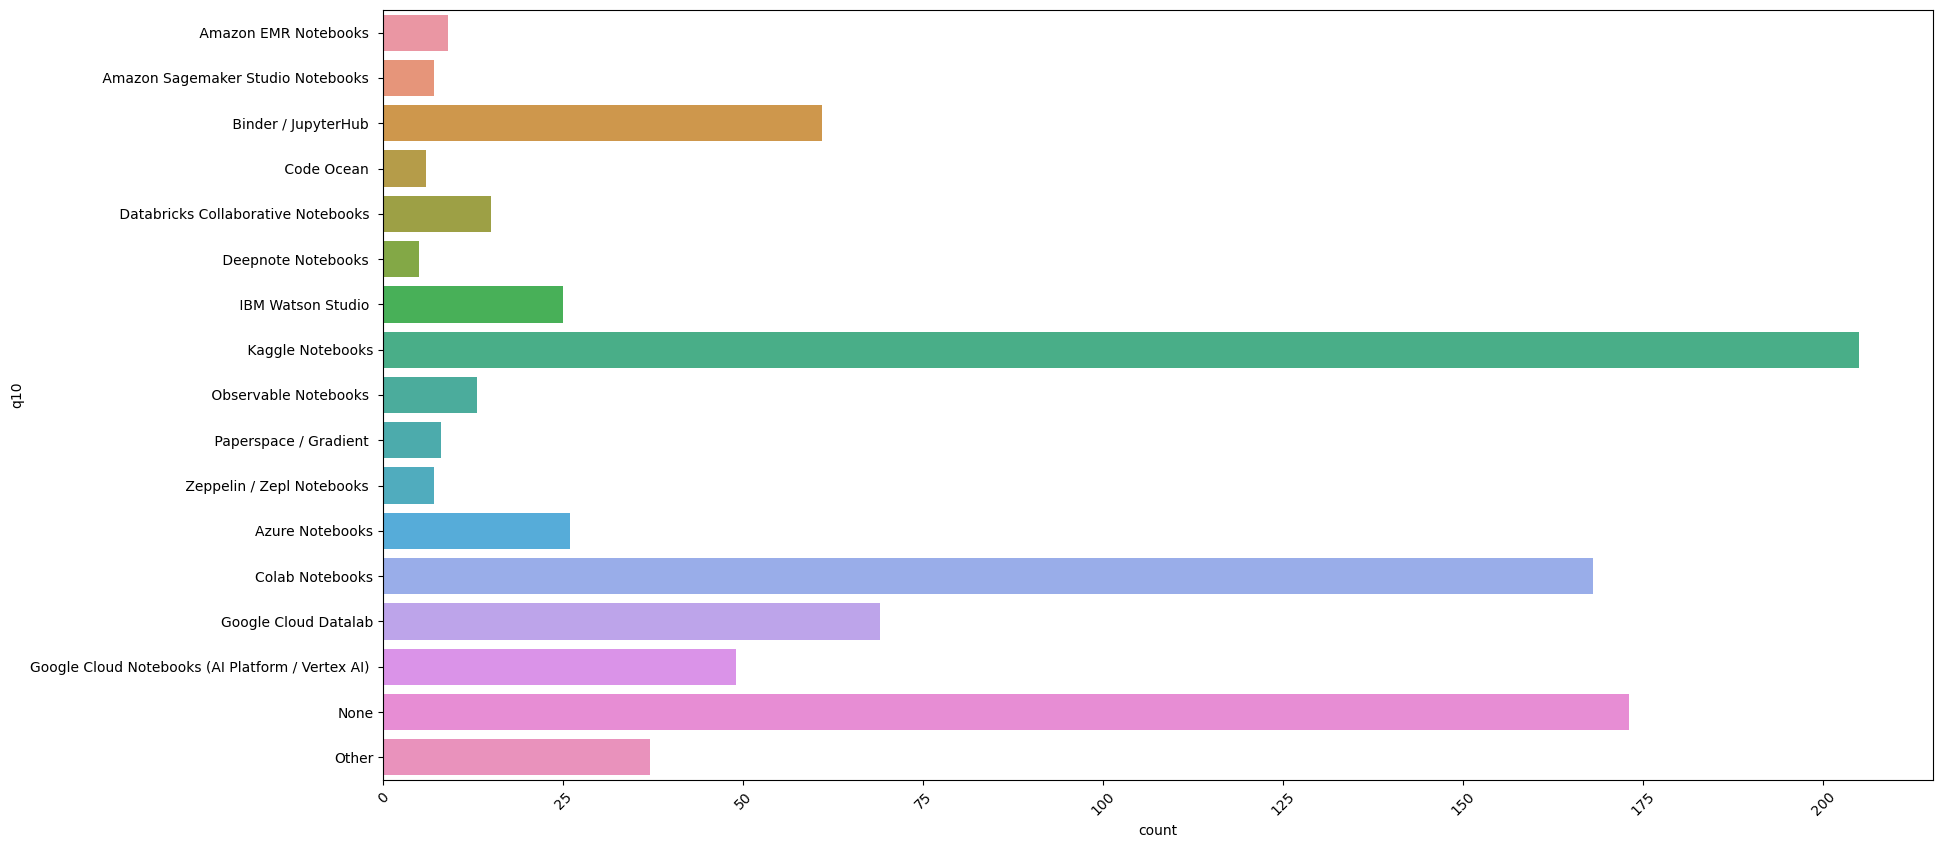

In [304]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q10', data=df_q10)
plt.xticks(rotation = 45);

In [305]:
df_q18 = df['q18'].reset_index()
df_q18

,index,q18
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [306]:
df_q18['q18'] = df_q18['q18'].apply(quitar_comillas)

In [307]:
df_18_explode = df_q18['q18'].explode().reset_index()

In [308]:
df_18_explode

,index,q18
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
1099,749,None
1100,750,Image segmentation methods (U-Net
1101,750,Mask R-CNN
1102,750,etc)


In [309]:
df_18_explode['q18'].unique()

array([None, 'Object detection methods (YOLOv3', ' RetinaNet', ' etc)',
       'Image classification and other general purpose networks (VGG',
       ' Inception', ' ResNet', ' ResNeXt', ' NASNet', ' EfficientNet',
       '', 'General purpose image/video tools (PIL', ' cv2', ' skimage',
       'Image segmentation methods (U-Net', ' Mask R-CNN', 'None',
       'Other', 'Generative Networks (GAN', ' VAE'], dtype=object)

In [310]:
gb_18 = df_18_explode.groupby('q18').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [311]:
df_q18 = gb_18.reset_index(name ='count')

In [312]:
df_q18.drop(0, axis = 0,inplace = True)

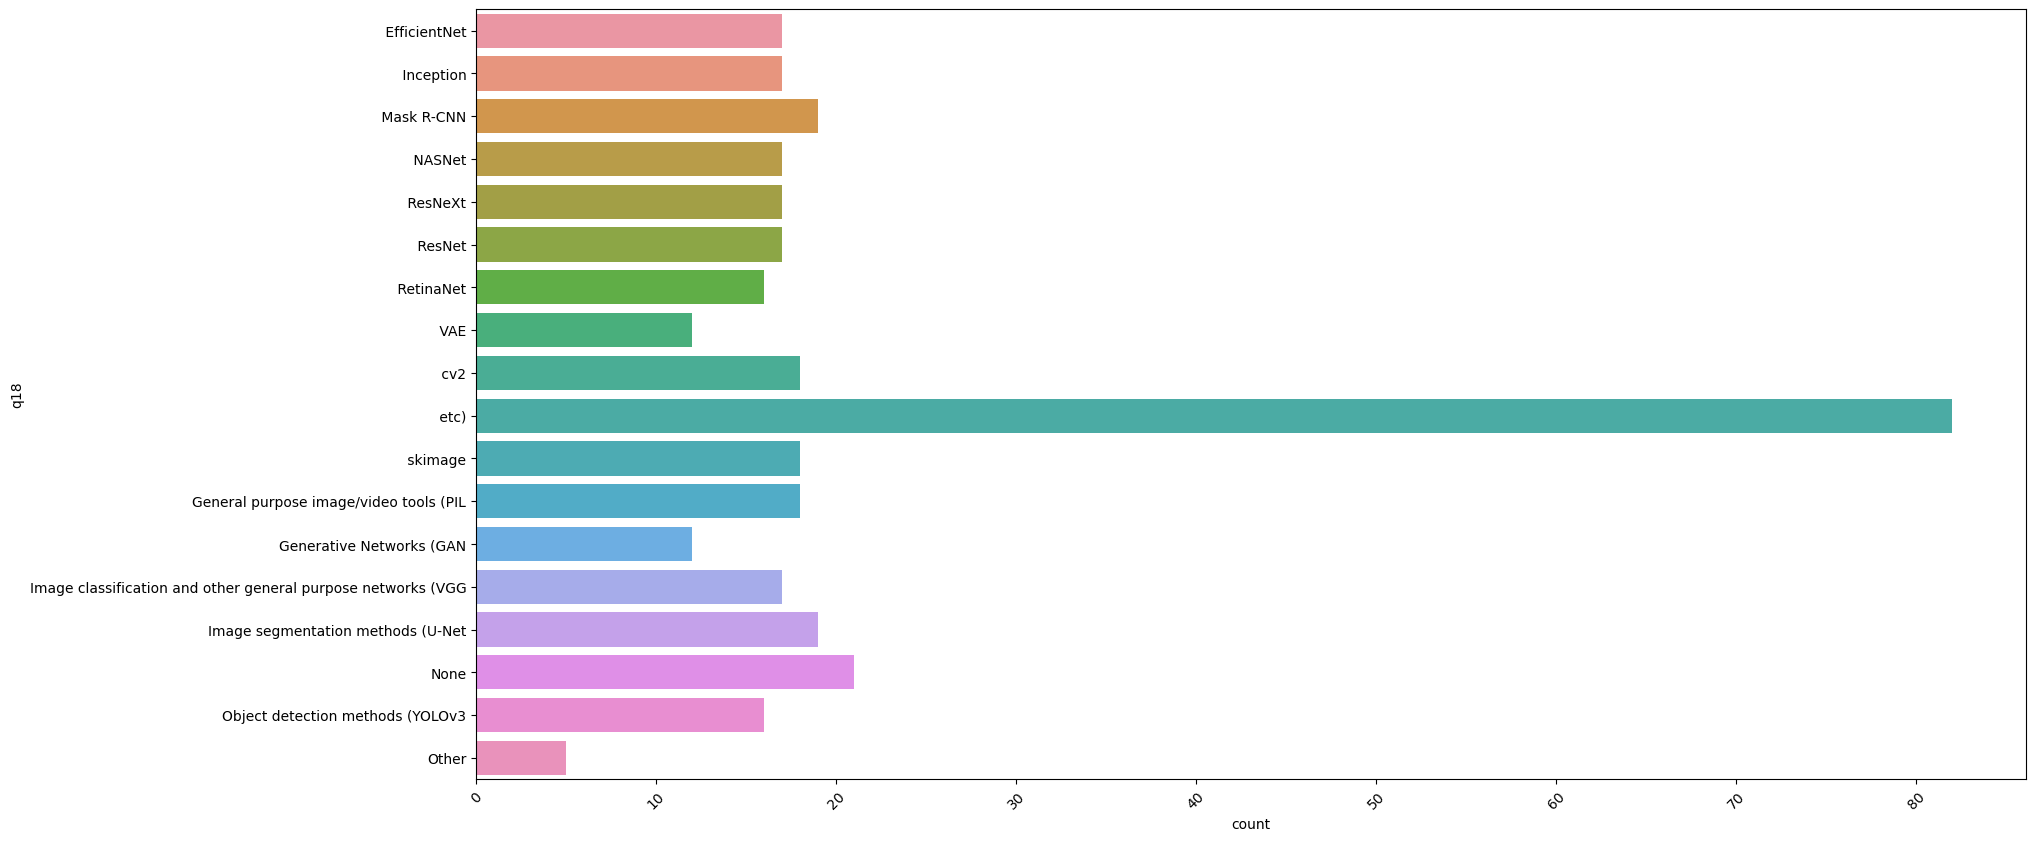

In [313]:
plt.figure(figsize = (20,10))
sns.barplot(x ='count', y = 'q18', data = df_q18)
plt.xticks(rotation = 45);

In [314]:
#q19

df_q19 = df['q19'].reset_index()
df_q19

,index,q19
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [315]:
df_q19['q19'] = df_q19['q19'].apply(quitar_comillas)

In [316]:
df_19_explode = df_q19['q19'].explode().reset_index()

In [317]:
df_19_explode

,index,q19
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
944,746,None
945,747,None
946,748,None
947,749,None


In [318]:
df_19_explode['q19'].unique()

array([None, 'Transformer language models (GPT-3', ' BERT', ' XLnet',
       ' etc)', '', 'Contextualized embeddings (ELMo', ' CoVe)',
       'Word embeddings/vectors (GLoVe', ' fastText', ' word2vec)',
       'None', 'Encoder-decorder models (seq2seq',
       ' vanilla transformers)', 'Other'], dtype=object)

In [319]:
gb_19 = df_19_explode.groupby('q19').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [320]:
df_q19 = gb_19.reset_index(name = 'count')

In [321]:
df_q19.drop(0, axis = 0,inplace = True)

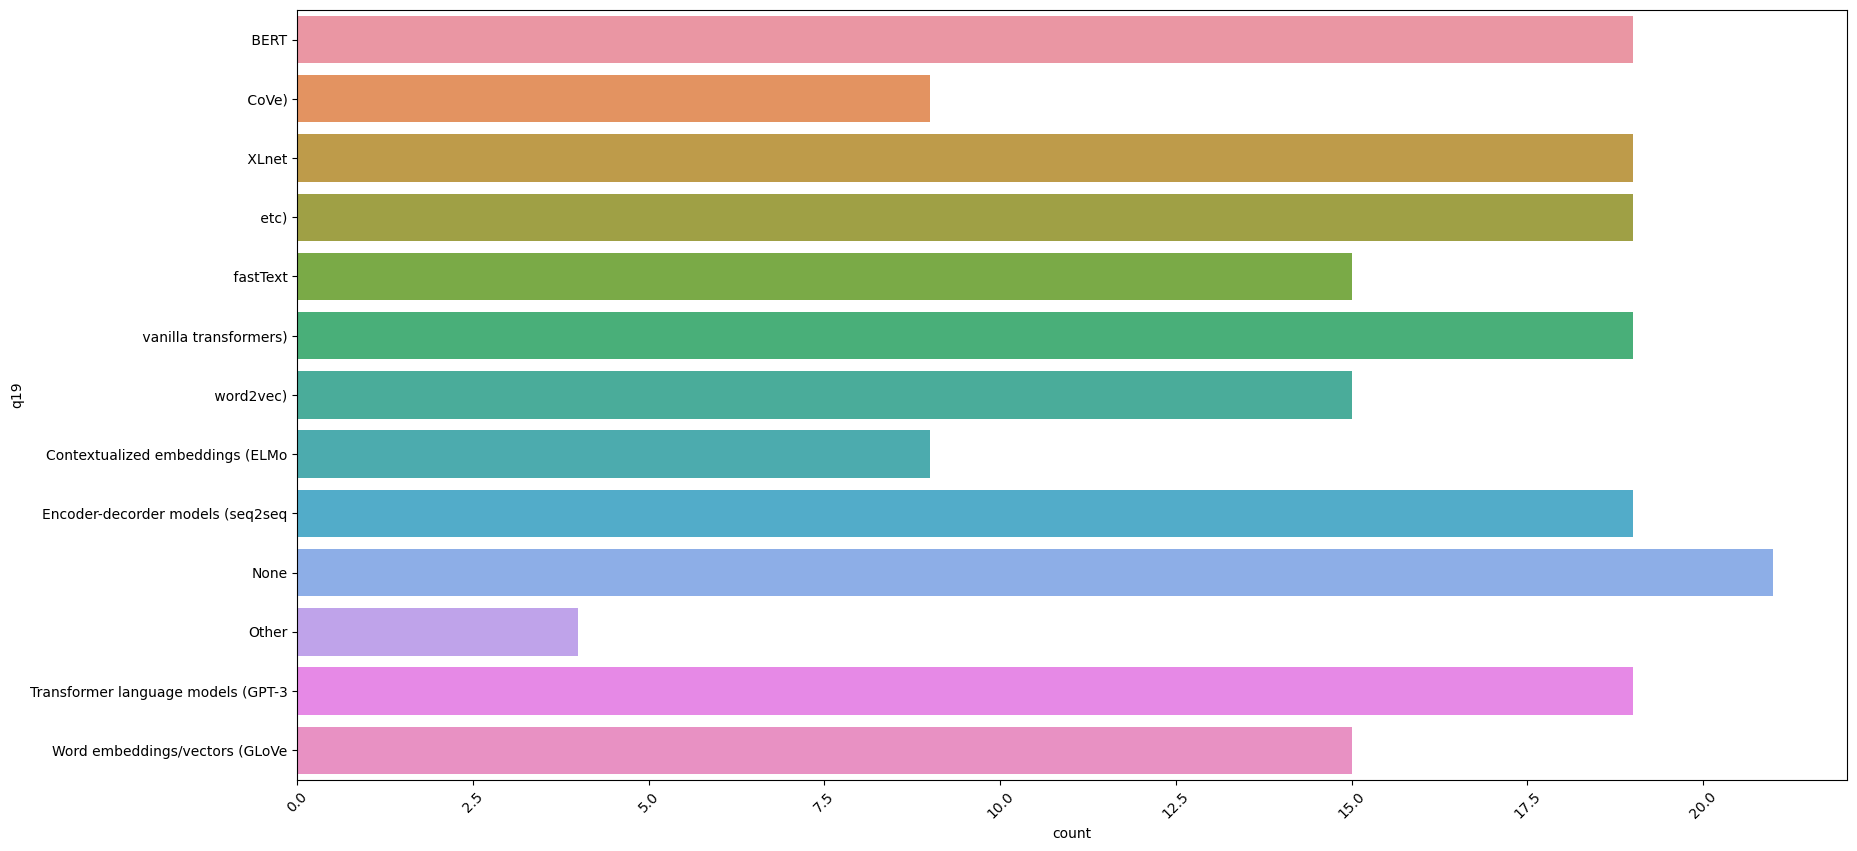

In [322]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q19', data = df_q19)
plt.xticks(rotation = 45);

In [323]:
#q27

df_q27 = df['q27'].reset_index()
df_q27

,index,q27
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,"None,"
...,...,...
746,25811,"Oracle Cloud ,"
747,25819,"Google Cloud Platform (GCP) , Oracle Cloud ,"
748,25909,NaN
749,25916,"None,"


In [324]:
df_q27['q27'] = df_q27['q27'].apply(quitar_comillas)

In [325]:
df_27_explode = df_q27['q27'].explode().reset_index()

In [326]:
df_27_explode

,index,q27
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
1201,747,
1202,748,None
1203,749,None
1204,749,


In [327]:
df_27_explode['q27'].unique()

array([None, 'None', '', ' Amazon Web Services (AWS) ',
       ' Microsoft Azure ', ' Google Cloud Platform (GCP) ',
       ' SAP Cloud ', ' Salesforce Cloud ', ' Alibaba Cloud ',
       ' IBM Cloud / Red Hat ', ' Oracle Cloud ', ' Tencent Cloud ',
       ' VMware Cloud ', 'Other'], dtype=object)

In [328]:
gb_27 = df_27_explode.groupby('q27').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [329]:
df_q27 = gb_27.reset_index(name = 'count')

In [330]:
df_q27.drop(0, axis = 0,inplace = True)

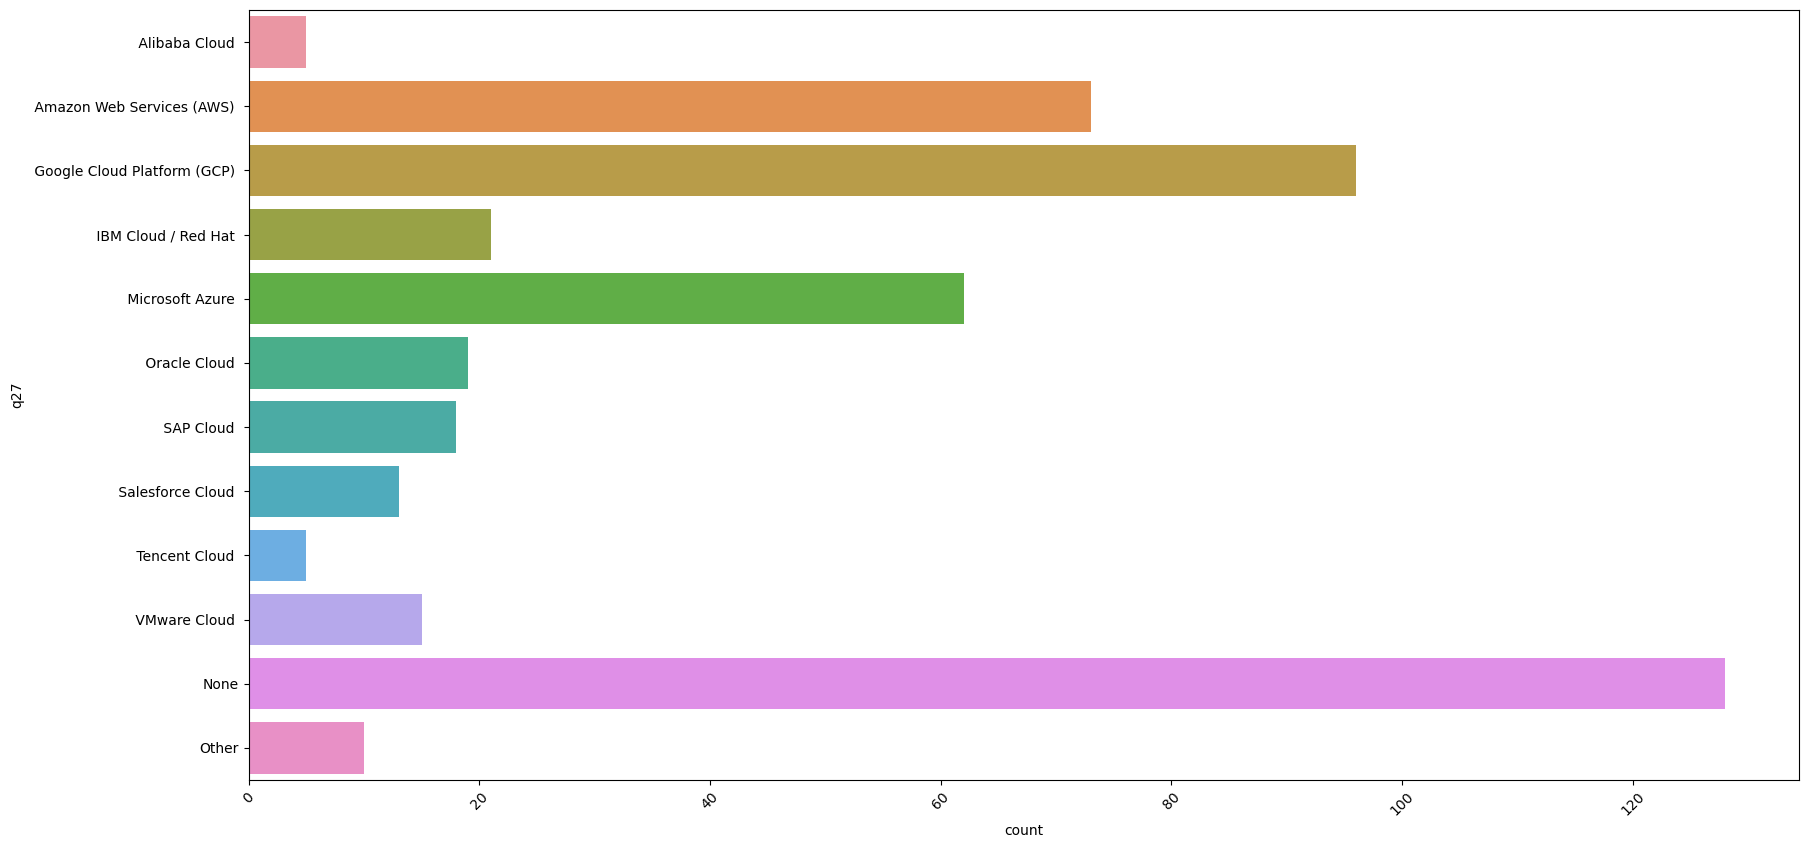

In [331]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q27', data = df_q27)
plt.xticks(rotation = 45);

# Q29

In [332]:
df_q29=df['q29'].reset_index()
df_q29

,index,q29
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,"No / None,"
748,25909,NaN
749,25916,NaN


In [333]:
df_q29['q29'] = df_q29['q29'].apply(quitar_comillas)
df_q29

,index,q29
0,32,None
1,46,None
2,66,None
3,102,None
4,108,None
...,...,...
746,25811,None
747,25819,"[No / None, ]"
748,25909,None
749,25916,None


In [334]:
df_29_explode = df_q29['q29'].explode().reset_index()
df_29_explode


,index,q29
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
936,747,No / None
937,747,
938,748,None
939,749,None


In [335]:
df_29_gp = df_29_explode.groupby('q29').size()
df_29_gp

q29
                                        169
 Amazon Elastic Compute Cloud (EC2)      31
 Google Cloud Compute Engine             48
 Microsoft Azure Virtual Machines        43
No / None                                68
Other                                     4
dtype: int64

In [336]:
df_29_gp = df_29_gp.reset_index(name='count')
df_29_gp

,q29,count
0,,169
1,Amazon Elastic Compute Cloud (EC2),31
2,Google Cloud Compute Engine,48
3,Microsoft Azure Virtual Machines,43
4,No / None,68
5,Other,4


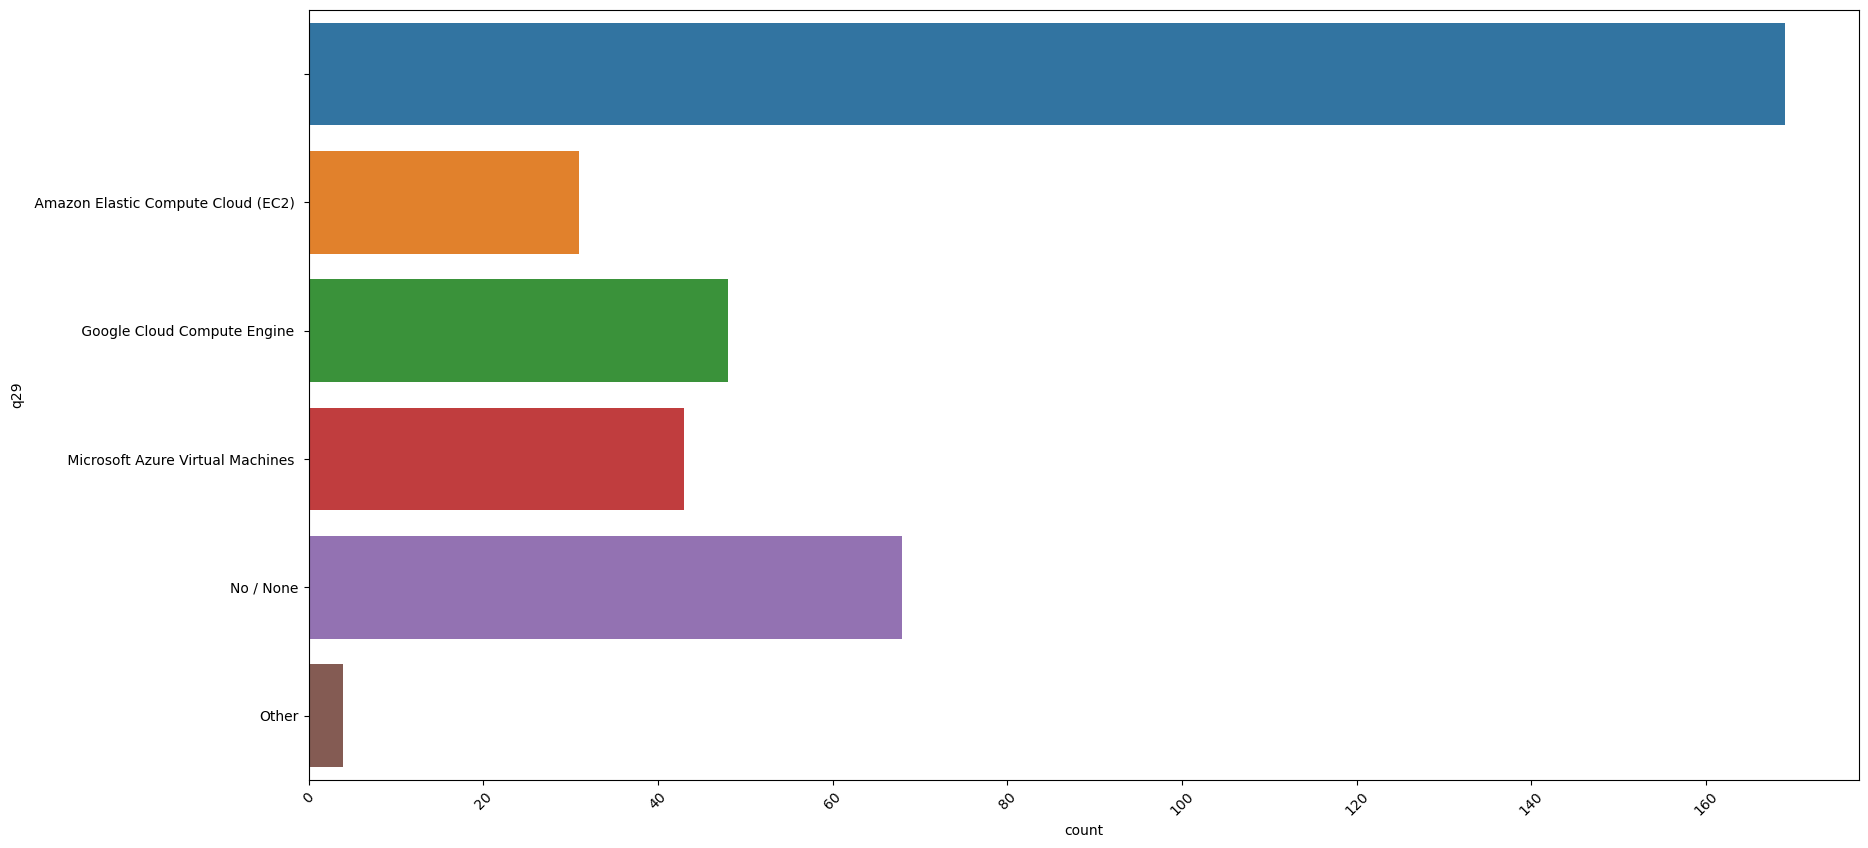

In [337]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q29', data=df_29_gp)
plt.xticks(rotation = 45);

# Q30

In [338]:
df_q30=df['q30'].reset_index()
df_q30

,index,q30
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,"Google Cloud Storage (GCS) ,"
748,25909,NaN
749,25916,NaN


In [339]:
df_q30['q30'] = df_q30['q30'].apply(quitar_comillas)
df_q30

,index,q30
0,32,None
1,46,None
2,66,None
3,102,None
4,108,None
...,...,...
746,25811,None
747,25819,"[Google Cloud Storage (GCS) , ]"
748,25909,None
749,25916,None


In [340]:
df_30_explode = df_q30['q30'].explode().reset_index()
df_30_explode

,index,q30
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
964,747,Google Cloud Storage (GCS)
965,747,
966,748,None
967,749,None


In [341]:
df_30_gp = df_30_explode.groupby('q30').size()
df_30_gp

q30
                                         169
 Amazon Elastic File System (EFS)         15
 Amazon Simple Storage Service (S3)       20
 Google Cloud Filestore                   23
Google Cloud Storage (GCS)                56
Microsoft Azure Data Lake Storage         25
Microsoft Azure Disk Storage              22
No / None                                 57
Other                                      4
dtype: int64

In [342]:
df_30_gp= df_30_gp.reset_index(name='count')
df_30_gp

,q30,count
0,,169
1,Amazon Elastic File System (EFS),15
2,Amazon Simple Storage Service (S3),20
3,Google Cloud Filestore,23
4,Google Cloud Storage (GCS),56
5,Microsoft Azure Data Lake Storage,25
6,Microsoft Azure Disk Storage,22
7,No / None,57
8,Other,4


In [343]:
df_30_gp.drop(0, axis= 0,inplace=True)

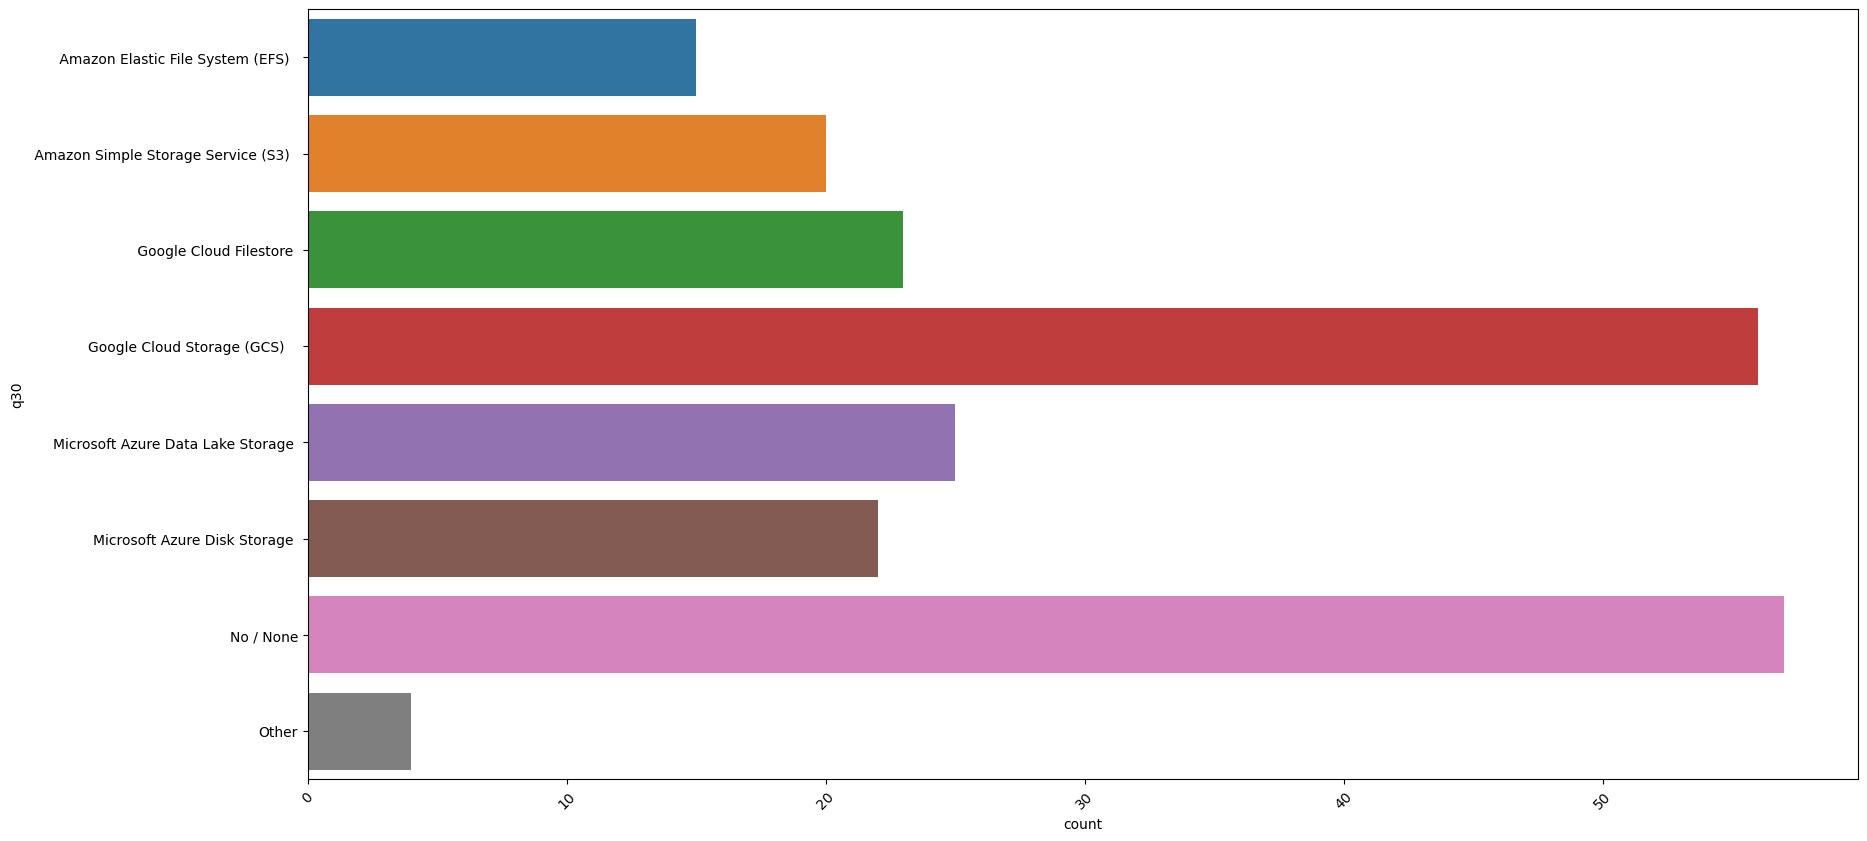

In [344]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q30', data=df_30_gp)
plt.xticks(rotation = 45);

# Q31

In [345]:
df_q31=df['q31'].reset_index()
df_q31

,index,q31
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,"No / None,"
...,...,...
746,25811,"No / None,"
747,25819,"No / None,"
748,25909,NaN
749,25916,"No / None,"


In [346]:
df_q31['q31'] = df_q31['q31'].apply(quitar_comillas)
df_q31

,index,q31
0,32,None
1,46,None
2,66,None
3,102,None
4,108,"[No / None, ]"
...,...,...
746,25811,"[No / None, ]"
747,25819,"[No / None, ]"
748,25909,None
749,25916,"[No / None, ]"


In [347]:
df_31_explode = df_q31['q31'].explode().reset_index()
df_31_explode

,index,q31
0,0,None
1,1,None
2,2,None
3,3,None
4,4,No / None
...,...,...
1101,747,
1102,748,None
1103,749,No / None
1104,749,


In [348]:
df_31_gp = df_31_explode.groupby('q31').size()
df_31_gp

q31
                                   320
 Alteryx                            14
 Amazon SageMaker                   16
 Azure Machine Learning Studio      25
 DataRobot                          13
 Databricks                         21
 Dataiku                             3
 Google Cloud Vertex AI             28
 Rapidminer                         11
No / None                          224
Other                               13
dtype: int64

In [349]:
df_31_gp= df_31_gp.reset_index(name='count')
df_31_gp.drop(0, axis= 0,inplace=True)
df_31_gp

,q31,count
1,Alteryx,14
2,Amazon SageMaker,16
3,Azure Machine Learning Studio,25
4,DataRobot,13
5,Databricks,21
6,Dataiku,3
7,Google Cloud Vertex AI,28
8,Rapidminer,11
9,No / None,224
10,Other,13


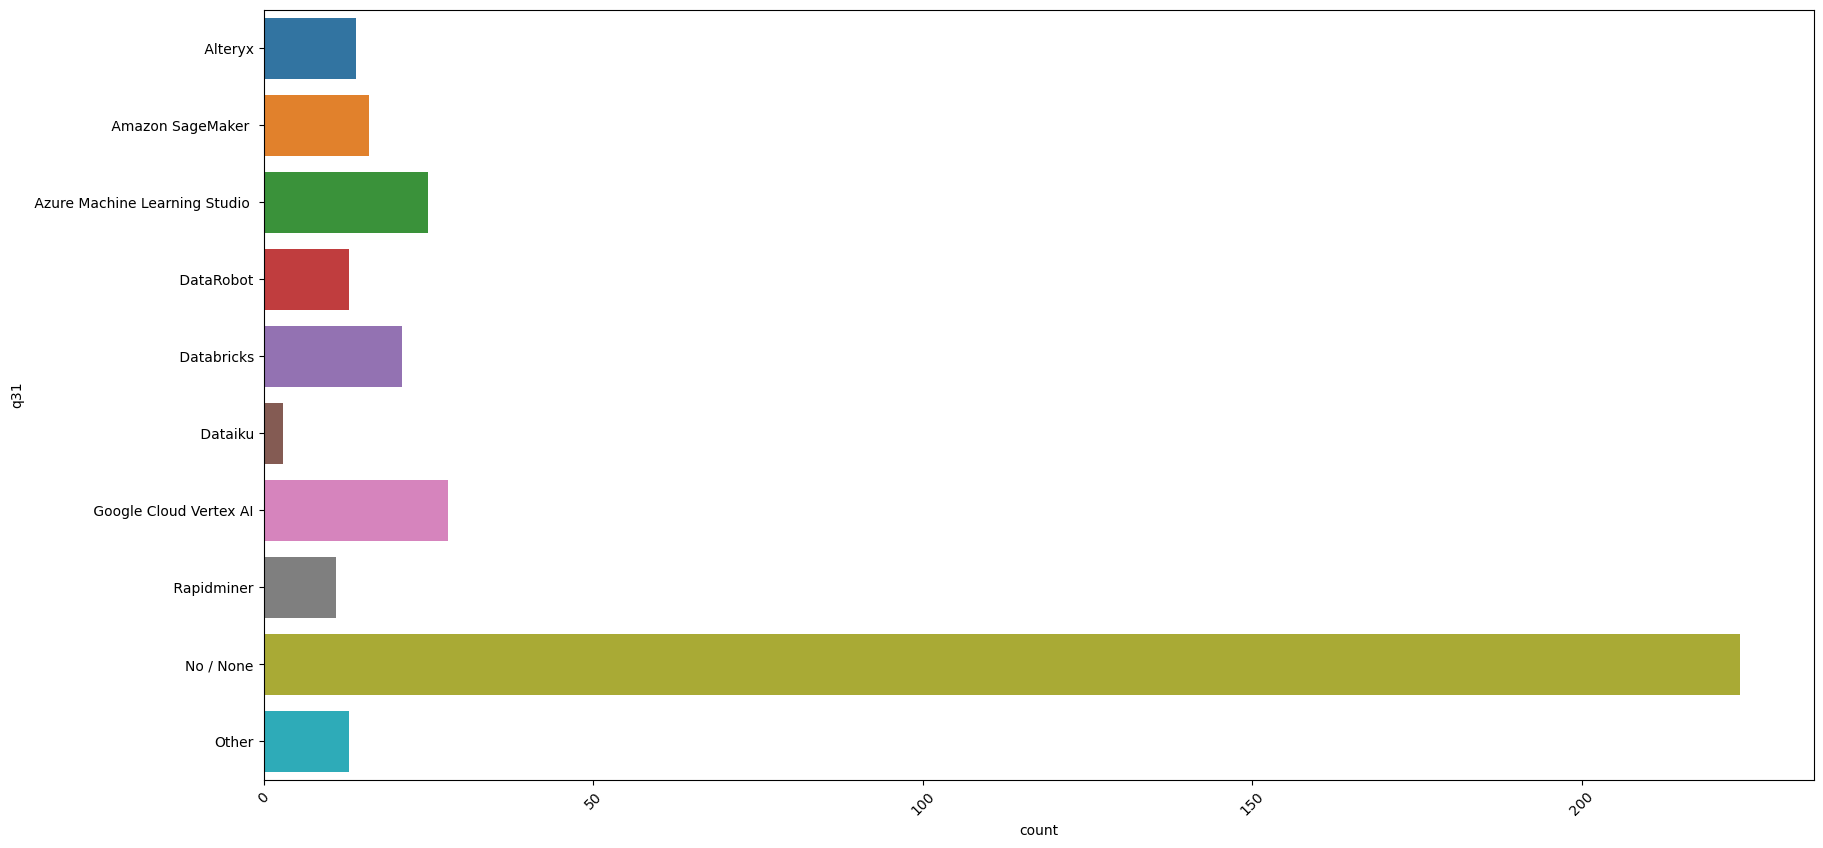

In [350]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q31', data=df_31_gp)
plt.xticks(rotation = 45);

# q33
    Which of the following big data products (relational database, data warehouse, data lake, or similar)
do you use most often?
    Question 33 (which specific product) was only asked to respondents that selected more than one choice
for Question 32-A (which of the following products)

In [351]:
df_q33=df['q33'].reset_index()
df_q33

,index,q33
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [352]:
df_q33['q33'] = df_q33['q33'].apply(quitar_comillas)

In [353]:
df_q33_explode = df_q33['q33'].explode().reset_index()

In [354]:
gb_q33 = df_q33_explode.groupby('q33').size()

In [355]:
df_q33 = gb_q33.reset_index(name='count')

In [356]:
df_q33.head()

,q33,count
0,Amazon DynamoDB,1
1,Amazon Redshift,1
2,Google Cloud BigQuery,16
3,Google Cloud BigTable,2
4,Google Cloud Firestore,3


In [357]:
df_q33.drop(0, axis= 0,inplace=True)

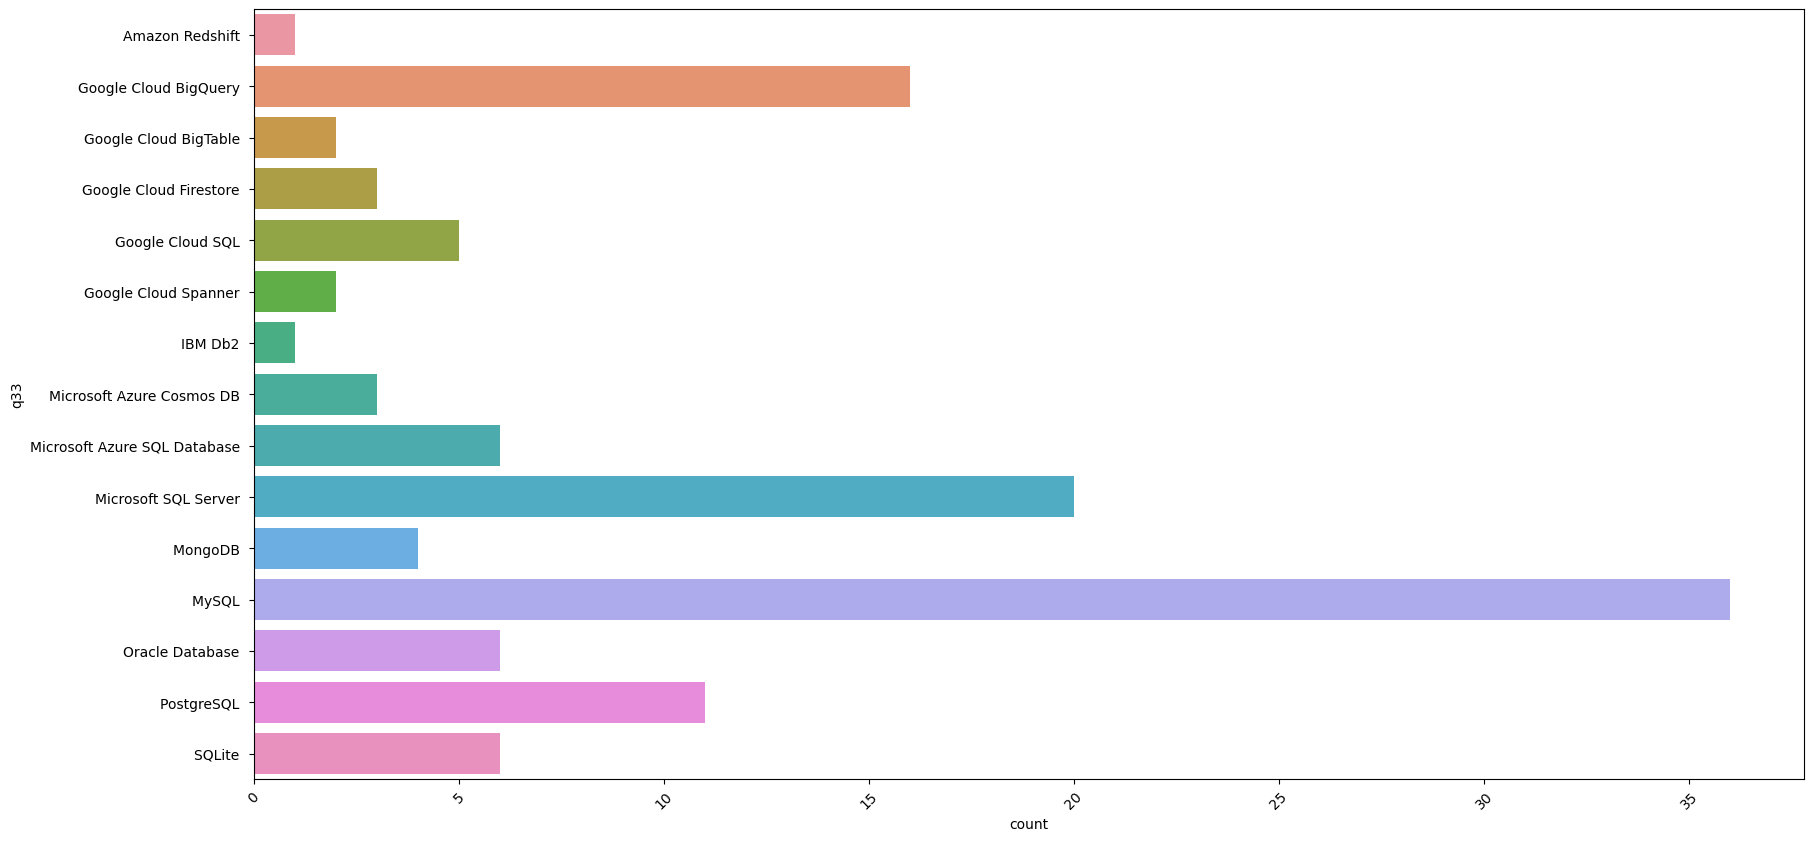

In [358]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q33', data=df_q33)
plt.xticks(rotation = 45);

# q36
- Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?

In [359]:
df_q36=df['q36'].reset_index()
df_q36

,index,q36
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,"No / None,"
747,25819,"No / None,"
748,25909,NaN
749,25916,"No / None,"


In [360]:
df_q36['q36'] = df_q36['q36'].apply(quitar_comillas)

In [361]:
df_q36_explode = df_q36['q36'].explode().reset_index()

In [362]:
gb_q36 = df_q36_explode.groupby('q36').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [363]:
df_q36 = gb_q36.reset_index(name='count')

In [364]:
df_q36.head()

,q36,count
0,,300
1,H2O Driverless AI),14
2,Vizier),7
3,albumentations),26
4,boruta_py),15


In [365]:
df_q36.drop(0, axis= 0,inplace=True)

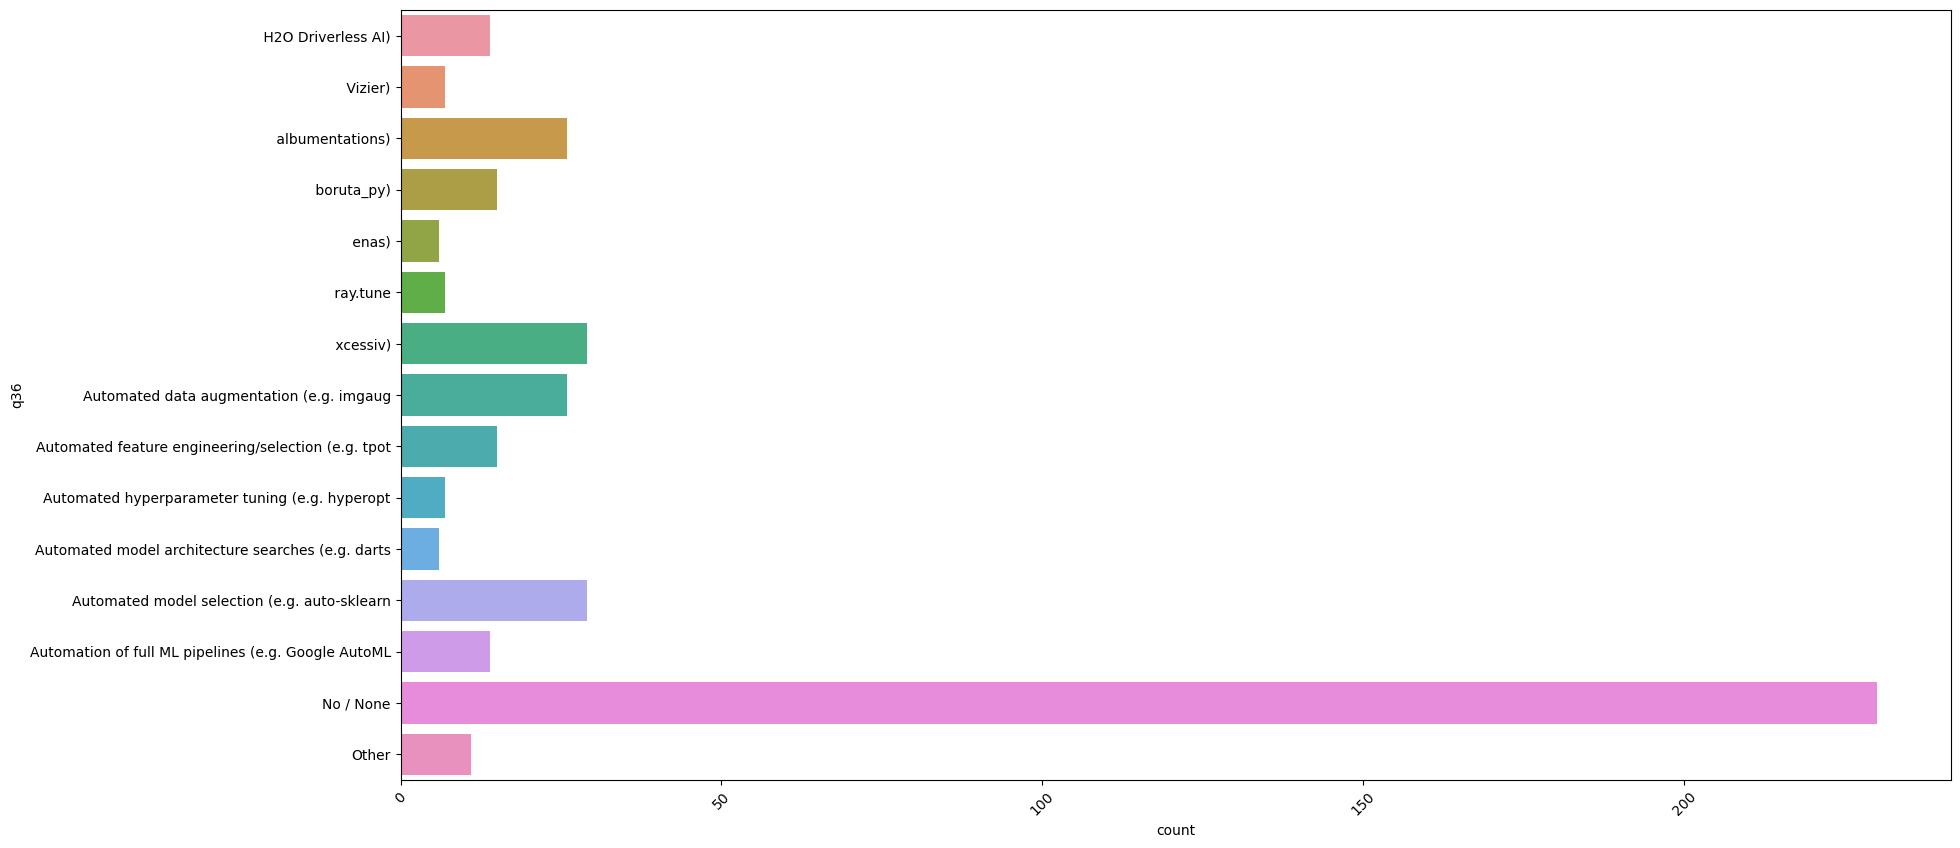

In [366]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q36', data=df_q36)
plt.xticks(rotation = 45);

# q37
- Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply).

- Question 37-A (which specific product) was only asked to respondents that answered affirmatively to  Question 36-A (which of the following categories of products)

In [367]:
df_q37=df['q37'].reset_index()
df_q37

,index,q37
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [368]:
df_q37['q37'] = df_q37['q37'].apply(quitar_comillas)

In [369]:
df_q37_explode = df_q37['q37'].explode().reset_index()

In [370]:
gb_q37 = df_q37_explode.groupby('q37').size()

In [371]:
df_q37 = gb_q37.reset_index(name='count')

In [372]:
df_q37.head()

,q37,count
0,,72
1,Amazon Sagemaker Autopilot,13
2,Azure Automated Machine Learning,15
3,DataRobot AutoML,6
4,Databricks AutoML,10


In [373]:
df_q37.drop(0, axis= 0,inplace=True)

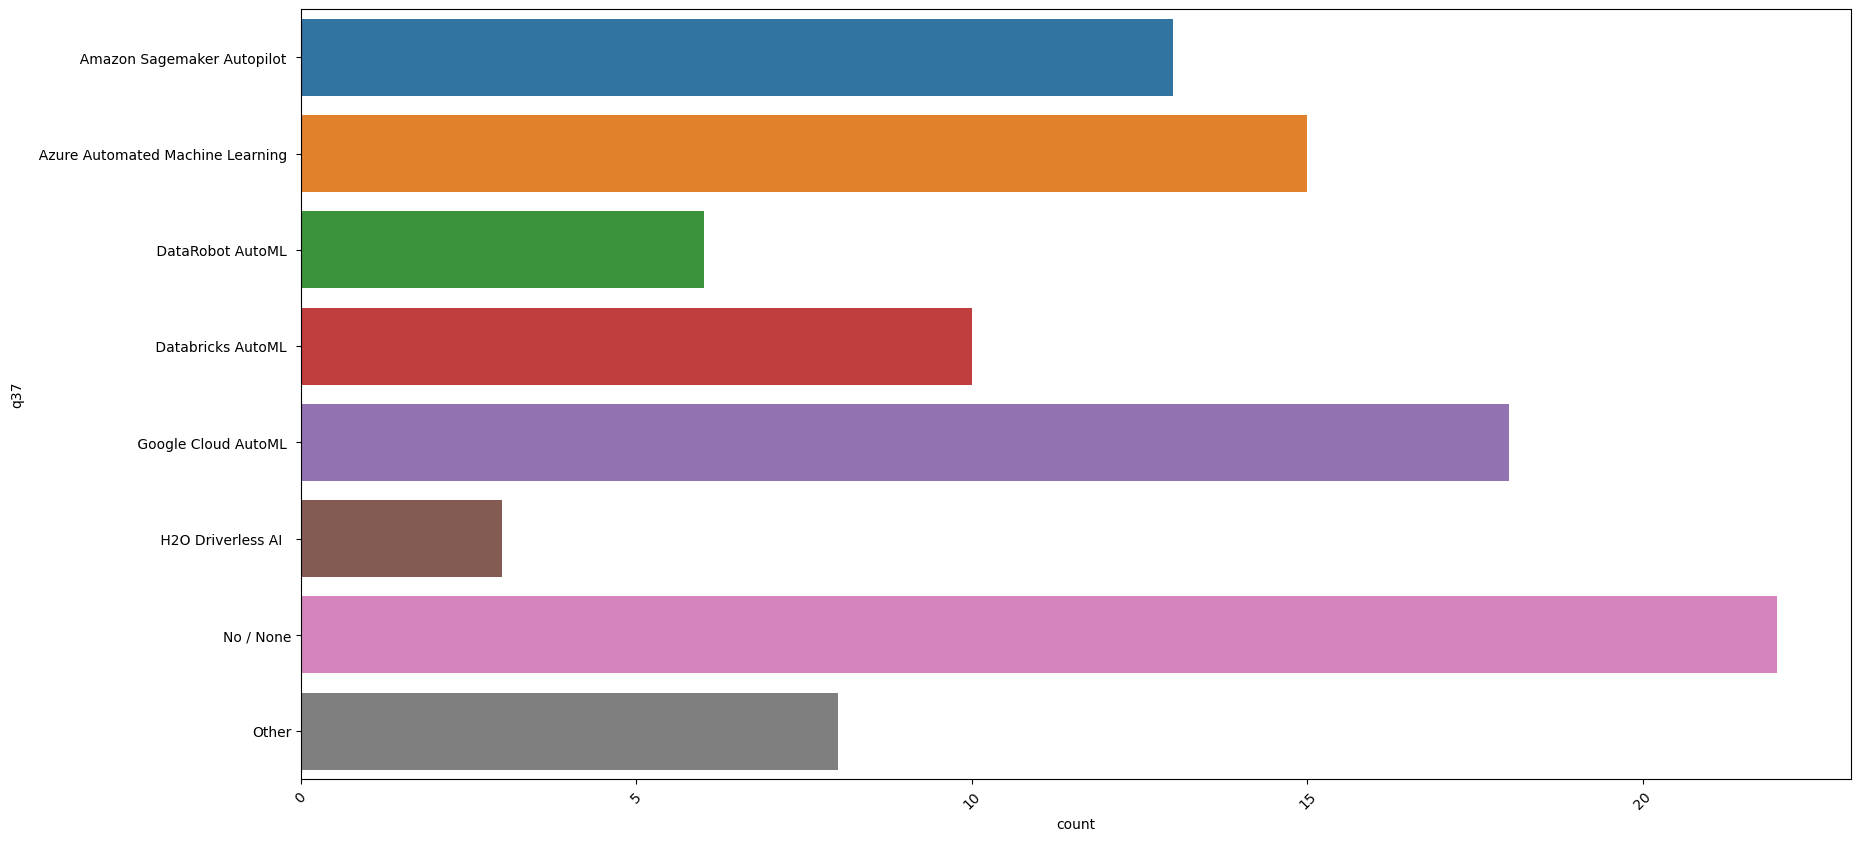

In [374]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q37', data=df_q37)
plt.xticks(rotation = 45);

# q38
- Do you use any tools to help manage machine learning experiments? (Select all that apply)

In [375]:
df_q38=df['q38'].reset_index()
df_q38

,index,q38
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,"No / None,"
747,25819,"No / None,"
748,25909,NaN
749,25916,"No / None,"


In [376]:
df_q38['q38'] = df_q38['q38'].apply(quitar_comillas)

In [377]:
df_q38_explode = df_q38['q38'].explode().reset_index()

In [378]:
gb_q38 = df_q38_explode.groupby('q38').size()

In [379]:
df_q38 = gb_q38.reset_index(name='count')

In [380]:
df_q38.head()

,q38,count
0,,301
1,ClearML,7
2,Comet.ml,3
3,Domino Model Monitor,4
4,Guild.ai,3


In [381]:
df_q38.drop(0, axis= 0,inplace=True)

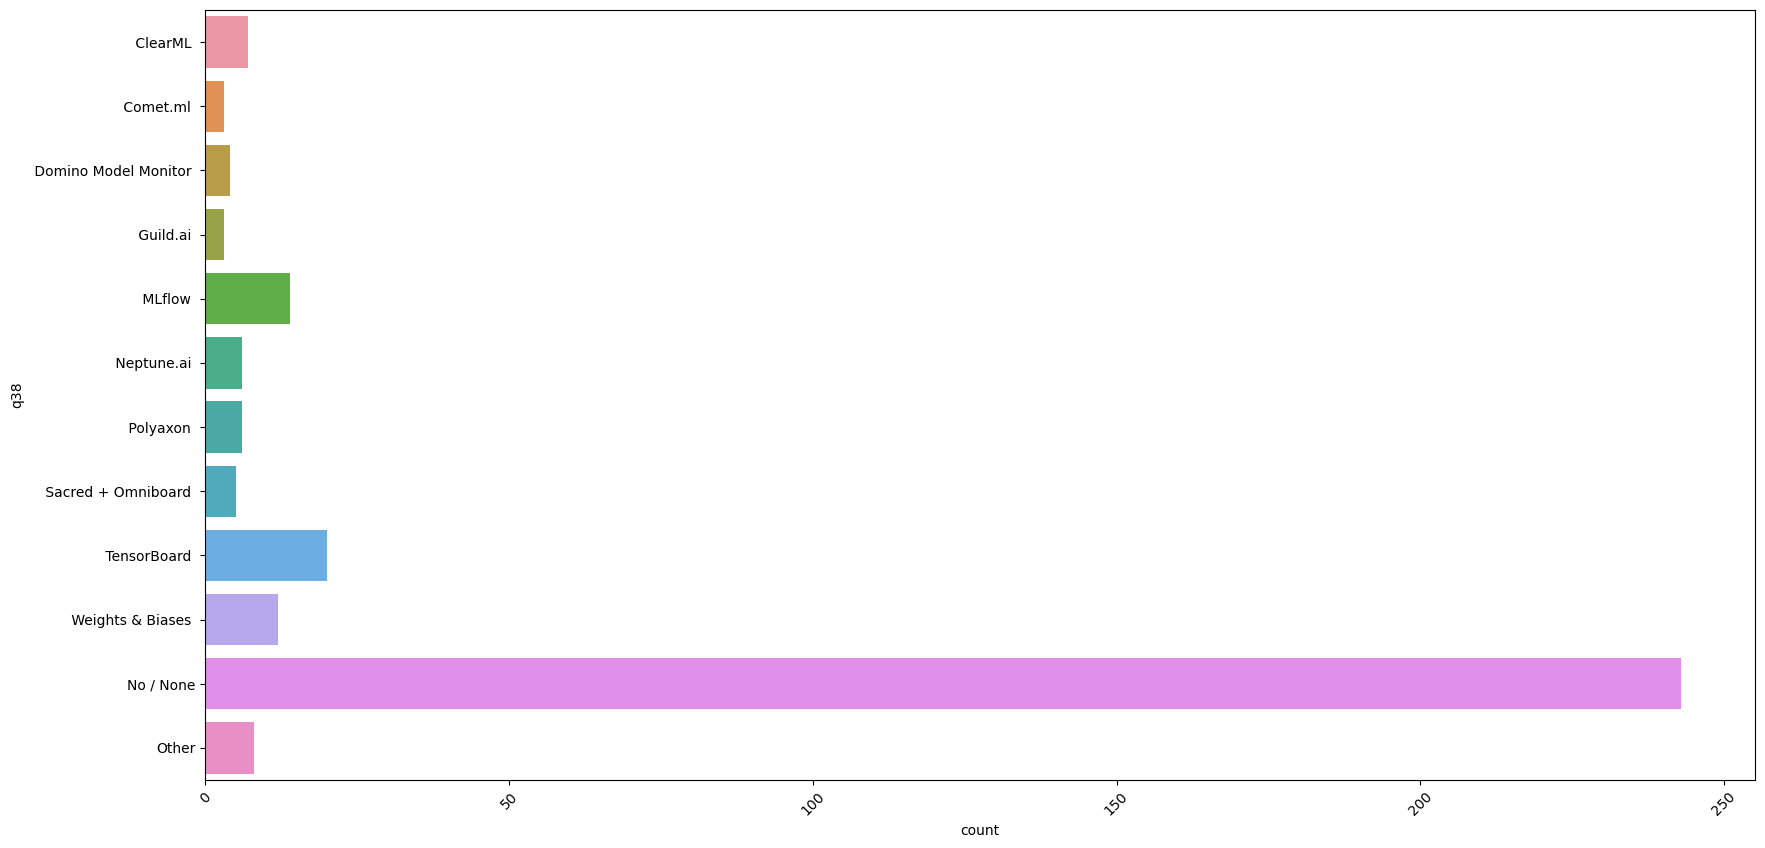

In [382]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q38', data=df_q38)
plt.xticks(rotation = 45);

# q39

In [383]:
df_q39=df['q39'].reset_index()
df_q39

,index,q39
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,"GitHub ,"
747,25819,"I do not share my work publicly,"
748,25909,NaN
749,25916,"I do not share my work publicly,"


In [384]:
df_q39['q39'] = df_q39['q39'].apply(quitar_comillas)

In [385]:
df_39_explode = df_q39['q39'].explode().reset_index()

In [386]:
df_39_explode

,index,q39
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
1185,747,
1186,748,None
1187,749,I do not share my work publicly
1188,749,


In [387]:
df_39_explode['q39'].unique()

array([None, 'I do not share my work publicly', '', ' GitHub ',
       ' Kaggle ', ' Colab ', ' Personal blog ', ' Plotly Dash ',
       ' Streamlit ', ' NBViewer ', 'Other', ' Shiny '], dtype=object)

In [388]:
gb39 = df_39_explode.groupby('q39').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [389]:
df_q39 = gb39.reset_index(name='count')

In [390]:
df_q39

,q39,count
0,,298
1,Colab,35
2,GitHub,142
3,Kaggle,117
4,NBViewer,5
5,Personal blog,19
6,Plotly Dash,7
7,Shiny,3
8,Streamlit,8
9,I do not share my work publicly,103


In [391]:
df_q39.drop(0, axis= 0,inplace=True)

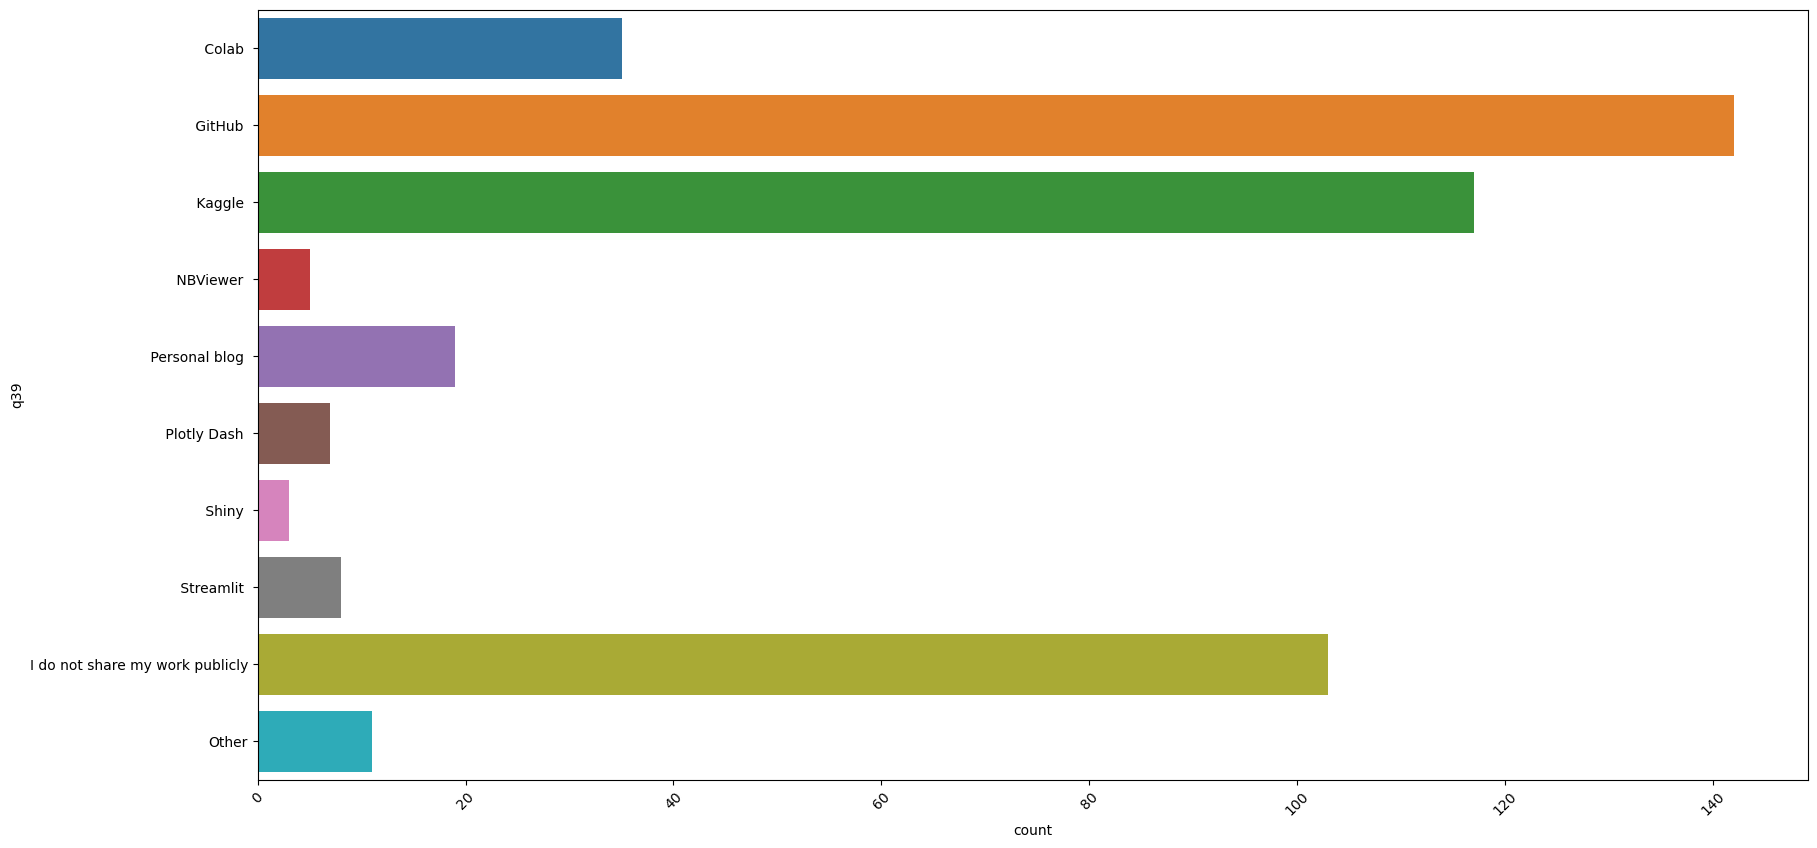

In [392]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q39', data=df_q39)
plt.xticks(rotation = 45);

# q40

In [393]:
df_q40=df['q40'].reset_index()
df_q40

,index,q40
0,32,NaN
1,46,"Coursera,edX,Kaggle Learn Courses,"
2,66,"None,"
3,102,"Coursera,Kaggle Learn Courses,DataCamp,Udemy,L..."
4,108,"Coursera,LinkedIn Learning,"
...,...,...
746,25811,"Coursera,Kaggle Learn Courses,Udemy,"
747,25819,"Coursera,Kaggle Learn Courses,LinkedIn Learning,"
748,25909,NaN
749,25916,"Coursera,Udemy,LinkedIn Learning,"


In [394]:
df_q40['q40'] = df_q40['q40'].apply(quitar_comillas)

In [395]:
df_40_explode = df_q40['q40'].explode().reset_index()

In [396]:
df_40_explode

,index,q40
0,0,None
1,1,Coursera
2,1,edX
3,1,Kaggle Learn Courses
4,1,
...,...,...
2121,749,Udemy
2122,749,LinkedIn Learning
2123,749,
2124,750,Coursera


In [397]:
df_40_explode['q40'].unique()

array([None, 'Coursera', 'edX', 'Kaggle Learn Courses', '', 'None',
       'DataCamp', 'Udemy', 'LinkedIn Learning',
       'University Courses (resulting in a university degree)',
       'Cloud-certification programs (direct from AWS', ' Azure', ' GCP',
       ' or similar)', 'Udacity', 'Other', 'Fast.ai'], dtype=object)

In [398]:
gb40 = df_40_explode.groupby('q40').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [399]:
df_q40 = gb40.reset_index(name='count')

In [400]:
df_q40

,q40,count
0,,479
1,Azure,41
2,GCP,41
3,or similar),41
4,Cloud-certification programs (direct from AWS,41
5,Coursera,246
6,DataCamp,145
7,Fast.ai,13
8,Kaggle Learn Courses,216
9,LinkedIn Learning,111


In [401]:
df_q40.drop(0, axis= 0,inplace=True)

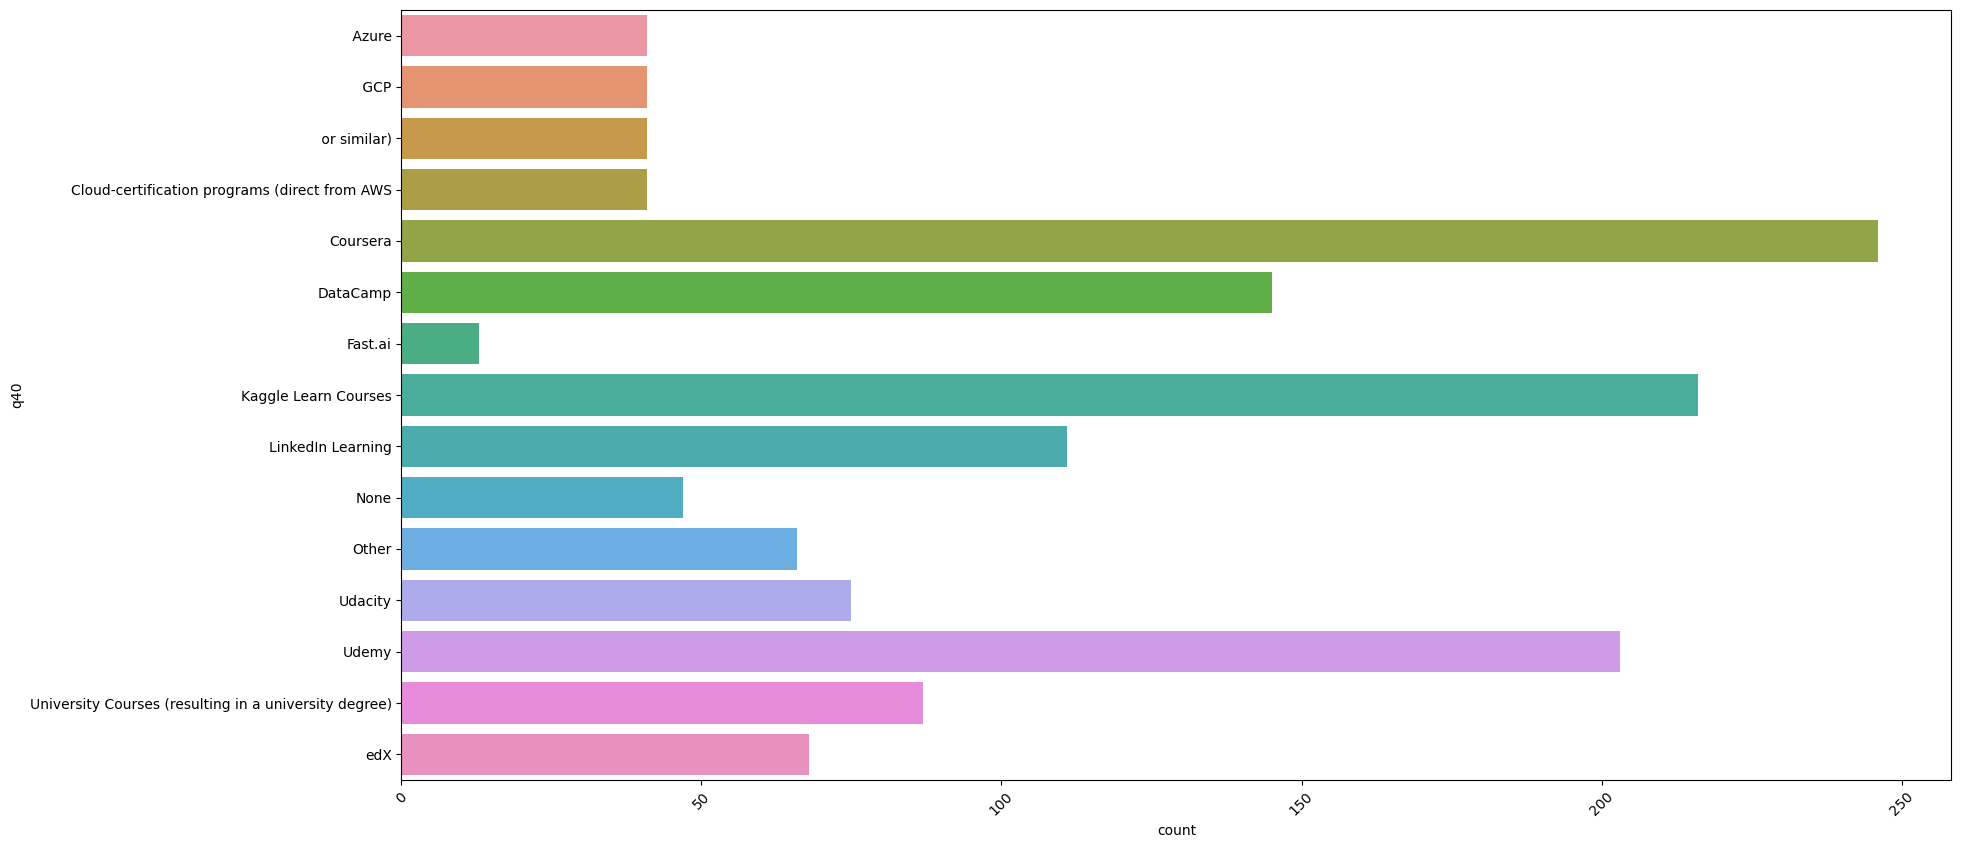

In [402]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q40', data=df_q40)
plt.xticks(rotation = 45);

# q42

In [403]:
df_q42=df['q42'].reset_index()
df_q42

,index,q42
0,32,NaN
1,46,"Twitter (data science influencers),Kaggle (not..."
2,66,"Kaggle (notebooks, forums, etc),"
3,102,"Reddit (r/machinelearning, etc),Kaggle (notebo..."
4,108,"Kaggle (notebooks, forums, etc),Blogs (Towards..."
...,...,...
746,25811,"Twitter (data science influencers),Email newsl..."
747,25819,"Kaggle (notebooks, forums, etc),"
748,25909,NaN
749,25916,"Kaggle (notebooks, forums, etc),Blogs (Towards..."


In [404]:
df_q42['q42'] = df_q42['q42'].apply(quitar_comillas)

In [405]:
df_42_explode = df_q42['q42'].explode().reset_index()

In [406]:
df_42_explode

,index,q42
0,0,None
1,1,Twitter (data science influencers)
2,1,Kaggle (notebooks
3,1,forums
4,1,etc)
...,...,...
3935,749,Blogs (Towards Data Science
3936,749,Analytics Vidhya
3937,749,etc)
3938,749,


In [407]:
df_42_explode['q42'].unique()

array([None, 'Twitter (data science influencers)', 'Kaggle (notebooks',
       ' forums', ' etc)', 'YouTube (Kaggle YouTube',
       ' Cloud AI Adventures', '', 'Reddit (r/machinelearning',
       'Slack Communities (ods.ai', ' kagglenoobs',
       'Blogs (Towards Data Science', ' Analytics Vidhya', 'None',
       'Course Forums (forums.fast.ai', ' Coursera forums',
       'Email newsletters (Data Elixir', " O'Reilly Data & AI",
       'Journal Publications (peer-reviewed journals',
       ' conference proceedings', 'Other',
       'Podcasts (Chai Time Data Science', ' O’Reilly Data Show'],
      dtype=object)

In [408]:
gb42 = df_42_explode.groupby('q42').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [409]:
df_q42 = gb42.reset_index(name='count')

In [410]:
df_q42

,q42,count
0,,501
1,Analytics Vidhya,145
2,Cloud AI Adventures,292
3,Coursera forums,79
4,O'Reilly Data & AI,68
5,O’Reilly Data Show,37
6,conference proceedings,33
7,etc),1039
8,forums,285
9,kagglenoobs,45


In [411]:
df_q42.drop(0, axis= 0,inplace=True)

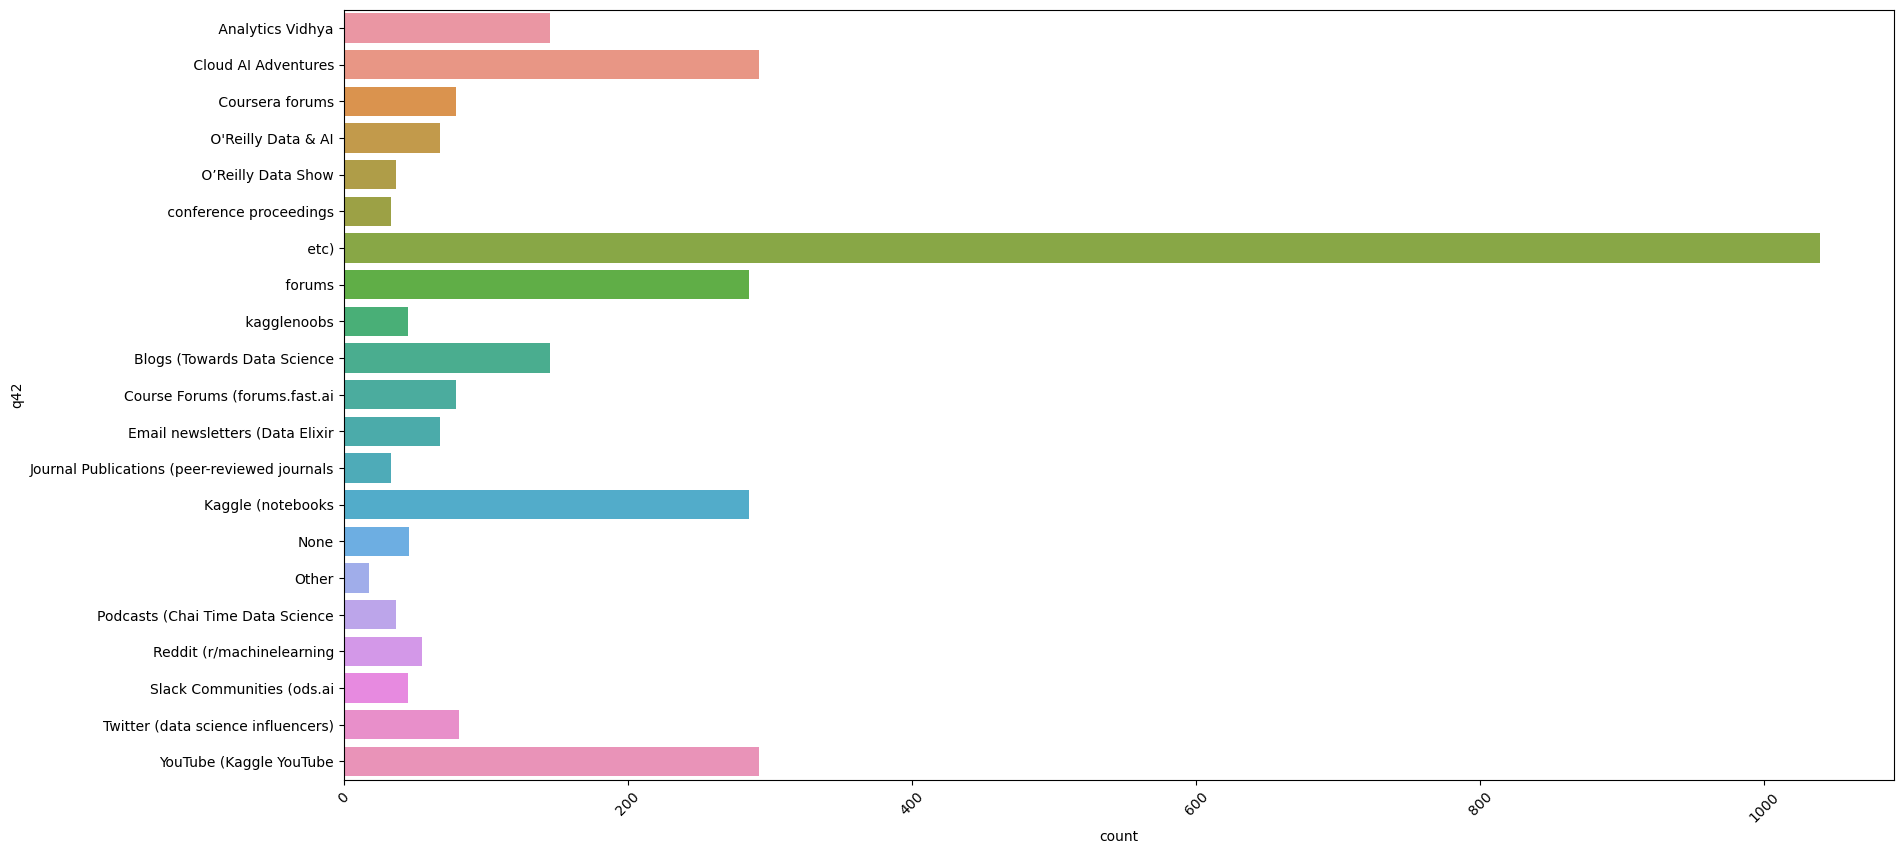

In [412]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q42', data=df_q42)
plt.xticks(rotation = 45);

 - q10:"notebook_products" 
 - q18:"vision_methods"
 - q19:"nlp"
 - q27:"cloud_platforms"
 - q29:"cloud_products"
 - q30:"data_storage_products"
 - q31:"ml_products"
 - q32:"bd_products"
 - q34:"bi_tools"
 - q36:"auto_ml"
 - q37:"aml_tools"
 - q38:"ml_experiment_tools"
 - q39:"share_app"
 - q40:"platform_courses_ds"
 - q42:"media_sources"


# Relación entre variables

q7

In [413]:
df_q7=df['q7'].reset_index()
df_q7

,index,q7
0,32,R
1,46,"Python, SQL, C, C++, Java, Javascript, MATLAB"
2,66,Python
3,102,Python
4,108,"Python, SQL"
...,...,...
746,25811,"Python, SQL"
747,25819,SQL
748,25909,"Python, SQL"
749,25916,"Python, SQL"


In [414]:
df_q7['q7'] = df_q7['q7'].apply(quitar_comillas)

In [415]:
df_7_explode = df_q7['q7'].explode().reset_index()

In [416]:
gb7 = df_7_explode.groupby('q7').size()

In [417]:
df_q7 = gb7.reset_index(name='count')

In [418]:
df_q7.drop(0, axis= 0,inplace=True)

q5

In [443]:
df_completo = pd.read_csv('./datos/HU2.csv', index_col = 0)
df_completo.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
0,0,India,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,No (we do not use ML methods),NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,NaN,"Colab Notebooks,","General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...","Google Cloud Platform (GCP) ,","Google Cloud Compute Engine ,","Google Cloud Storage (GCS) ,","No / None,","No / None,",NaN,"No / None,","GitHub , Kaggle ,","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...","Email newsletters (Data Elixir, O'Reilly Data ..."
1,1,Indonesia,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,"Kaggle Notebooks,Colab Notebooks,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kaggle Learn Courses,Cloud-certification progr...","Journal Publications (peer-reviewed journals, ..."
2,2,Pakistan,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,I do not know,MySQL,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,NaN,NaN,None of these activities are an important par...,NaN,"Kaggle Notebooks,",NaN,NaN,"None,",NaN,NaN,"DataRobot,","No / None,",NaN,"No / None,","I do not share my work publicly,","DataCamp,","Kaggle (notebooks, forums, etc),YouTube (Kaggl..."
3,3,Mexico,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,I do not know,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,NaN,"Colab Notebooks,","General purpose image/video tools (PIL, cv2, s...","None,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Coursera,edX,","YouTube (Kaggle YouTube, Cloud AI Adventures, ..."
4,4,India,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,10-20 years,We use ML methods for generating insights (but...,NaN,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,"Google Cloud Datalab,",NaN,NaN,"Microsoft Azure ,","Microsoft Azure Virtual Machines ,","Microsoft Azure Data Lake Storage ,","Azure Machine Learning Studio ,","No / None,",NaN,"Weights & Biases ,","I do not share my work publicly,","Kaggle Learn Courses,Udemy,","Journal Publications (peer-reviewed journals, ..."


In [420]:
df_q5=df_completo['q5'].reset_index()
df_q5

,index,q5
0,0,Other
1,1,Program/Project Manager
2,2,Software Engineer
3,3,Research Scientist
4,4,Other
...,...,...
25968,25968,Data Analyst
25969,25969,Student
25970,25970,Research Scientist
25971,25971,Data Scientist


In [444]:
df_q5['q5'] = df_q5['q5'].apply(quitar_comillas)

In [422]:
df_5_explode = df_q5['q5'].explode().reset_index()

In [423]:
gb5 = df_5_explode.groupby('q5').size()

In [424]:
df_q5 = gb5.reset_index(name='count')

In [425]:
df_q5.drop(0, axis= 0,inplace=True)

q9

In [455]:
df_q9=df['q9'].reset_index()
df_q9

,index,q9
0,32,RStudio
1,46,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,..."
2,66,"PyCharm , Spyder"
3,102,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,..."
4,108,"Jupyter Notebook, Other"
...,...,...
746,25811,"PyCharm , Vim / Emacs,Jupyter Notebook"
747,25819,Visual Studio
748,25909,Jupyter Notebook
749,25916,Jupyter Notebook


In [456]:
df_q9['q9'] = df_q9['q9'].apply(quitar_comillas)

In [457]:
df_9_explode = df_q9['q9'].explode().reset_index()

In [458]:
gb9 = df_9_explode.groupby('q9').size()

In [459]:
df_q9 = gb9.reset_index(name='count')

In [460]:
df_q9.drop(0, axis= 0,inplace=True)

q11

In [461]:
df_q11=df['q11'].reset_index()
df_q11

,index,q11
0,32,A personal computer / desktop
1,46,A personal computer / desktop
2,66,A laptop
3,102,A laptop
4,108,A personal computer / desktop
...,...,...
746,25811,A laptop
747,25819,A laptop
748,25909,A laptop
749,25916,A laptop


In [462]:
df_q11['q11'] = df_q11['q11'].apply(quitar_comillas)

In [463]:
df_11_explode = df_q11['q11'].explode().reset_index()

In [464]:
gb11 = df_11_explode.groupby('q11').size()

In [465]:
df_q11 = gb11.reset_index(name='count')

In [466]:
df_q11.drop(0, axis= 0,inplace=True)

[Text(0, 0.5, 'Roles'), Text(0.5, 0, 'Conteo')]

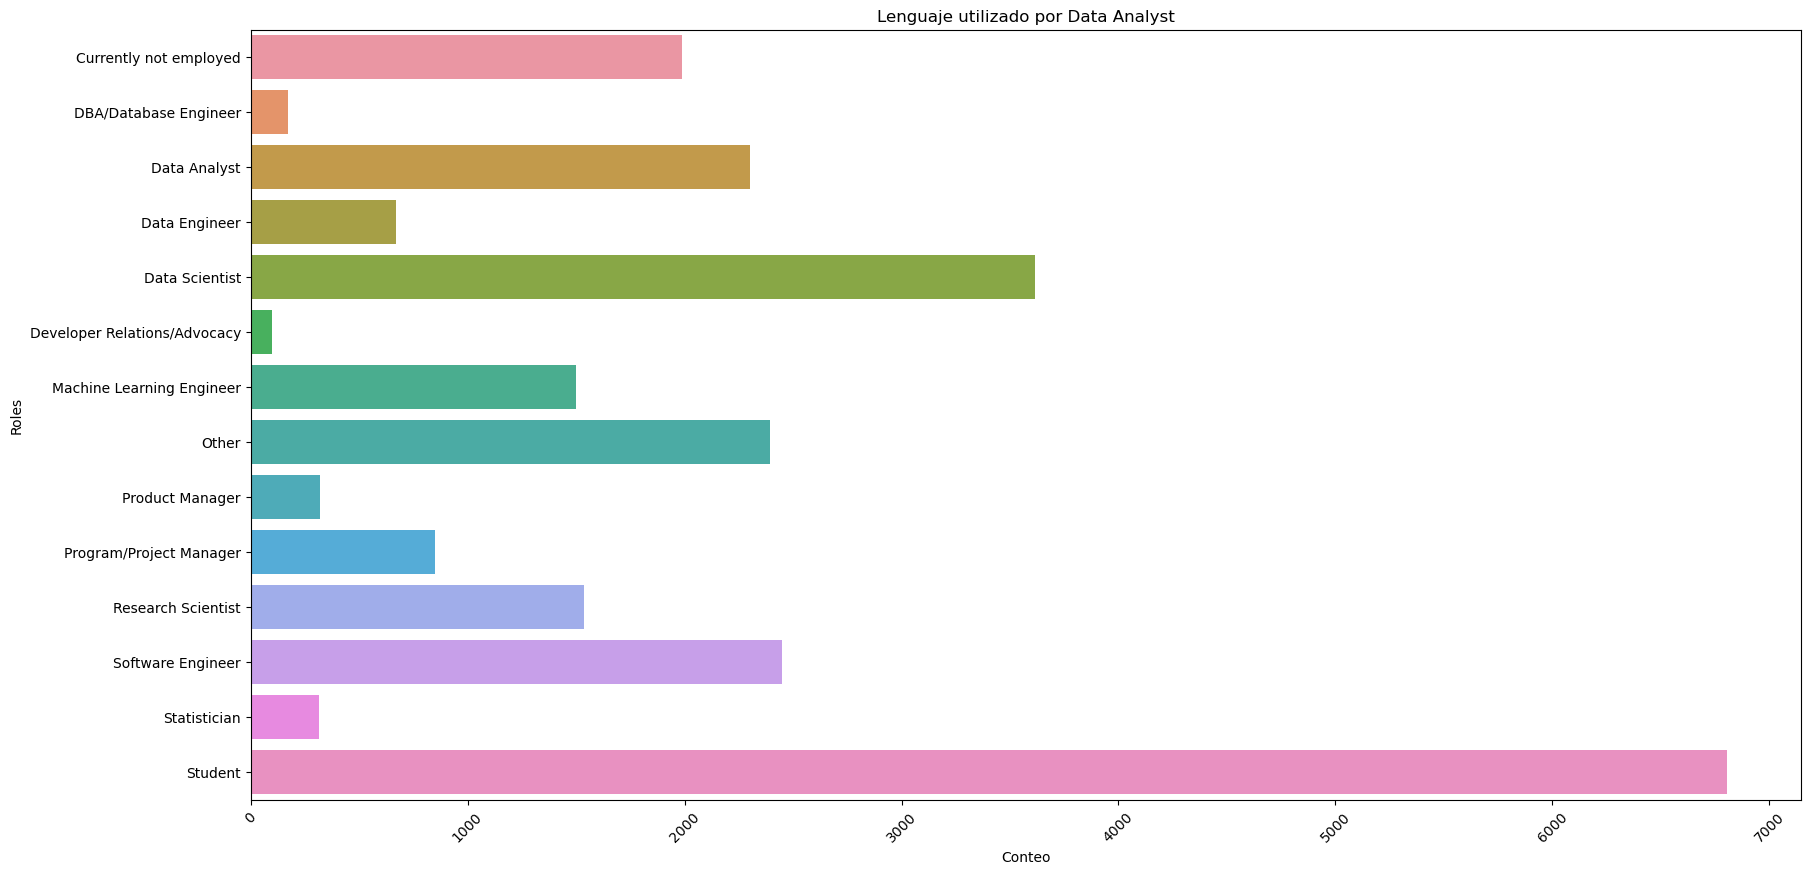

In [432]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q5', data=df_q5)
plt.title('Lenguaje utilizado por Data Analyst')
plt.xticks(rotation = 45)
fig.set(ylabel='Roles', xlabel= 'Conteo')

[Text(0, 0.5, 'Lenguajes'), Text(0.5, 0, 'Conteo')]

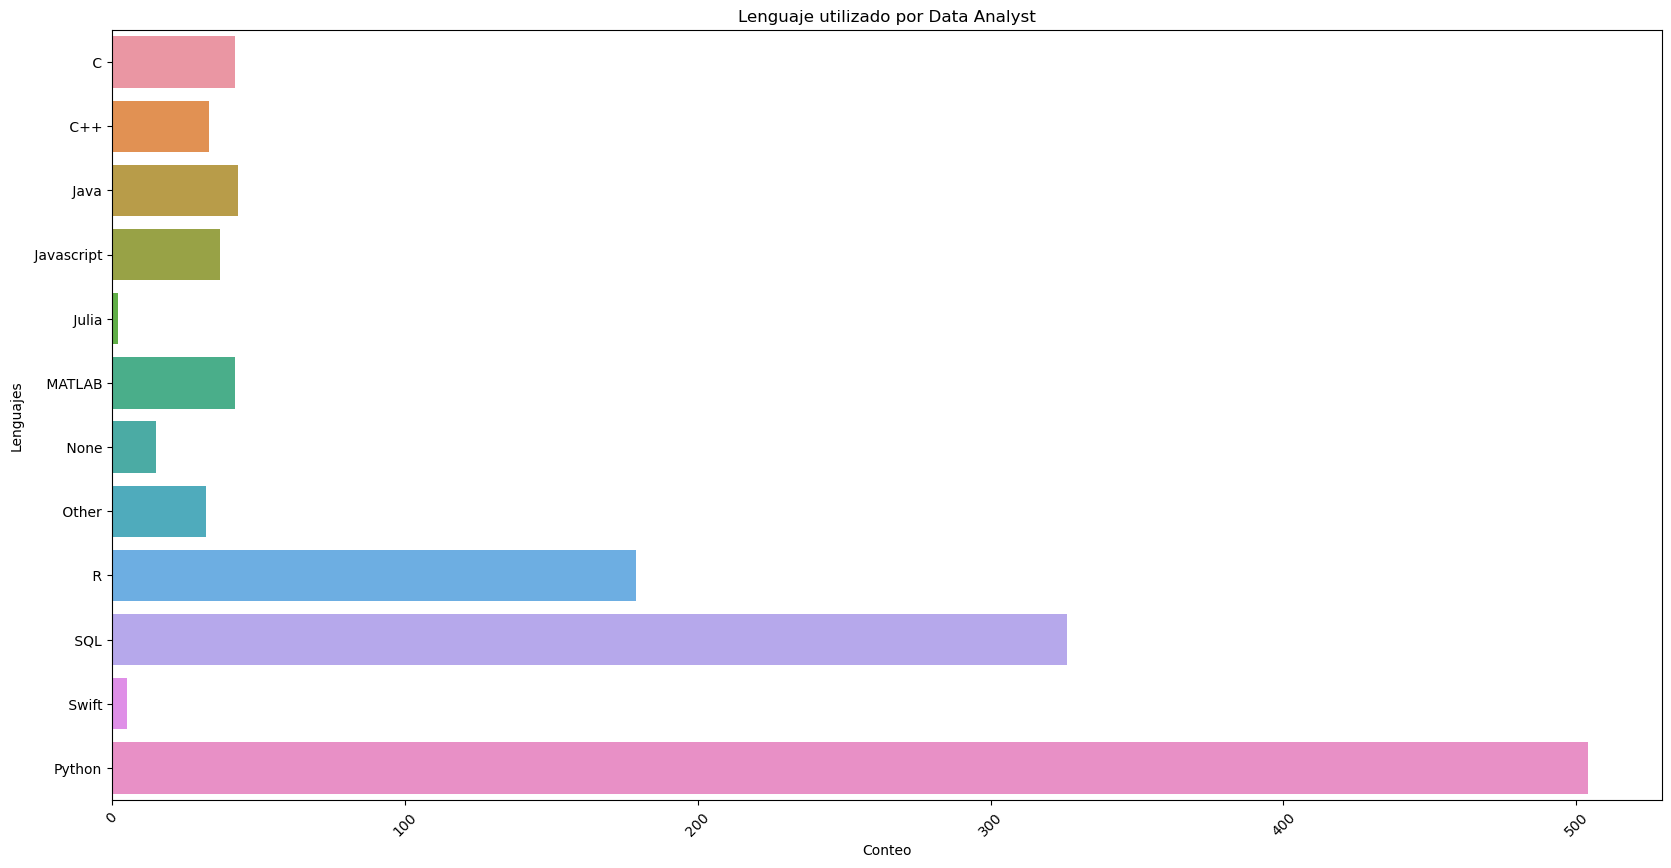

In [433]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q7', data=df_q7)
plt.title('Lenguaje utilizado por Data Analyst')
plt.xticks(rotation = 45)
fig.set(ylabel='Lenguajes', xlabel= 'Conteo')

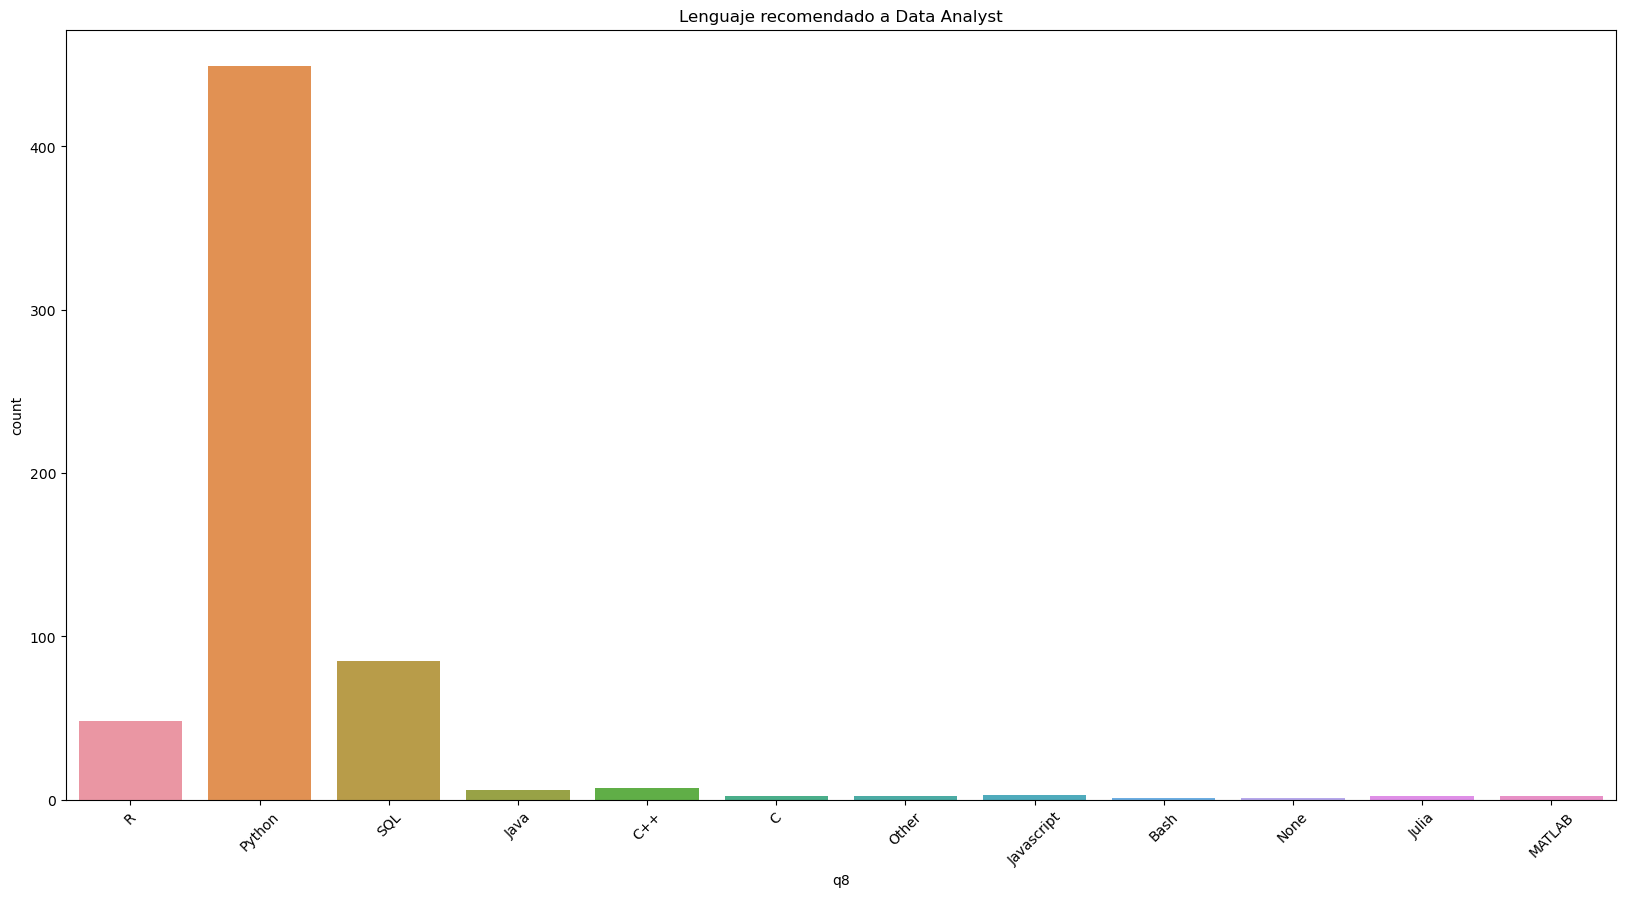

In [434]:
plt.figure(figsize=(20,10))
sns.countplot(x ='q8', data=df)
plt.title('Lenguaje recomendado a Data Analyst')
plt.xticks(rotation = 45);

[Text(0, 0.5, 'Entornos'), Text(0.5, 0, 'Conteo')]

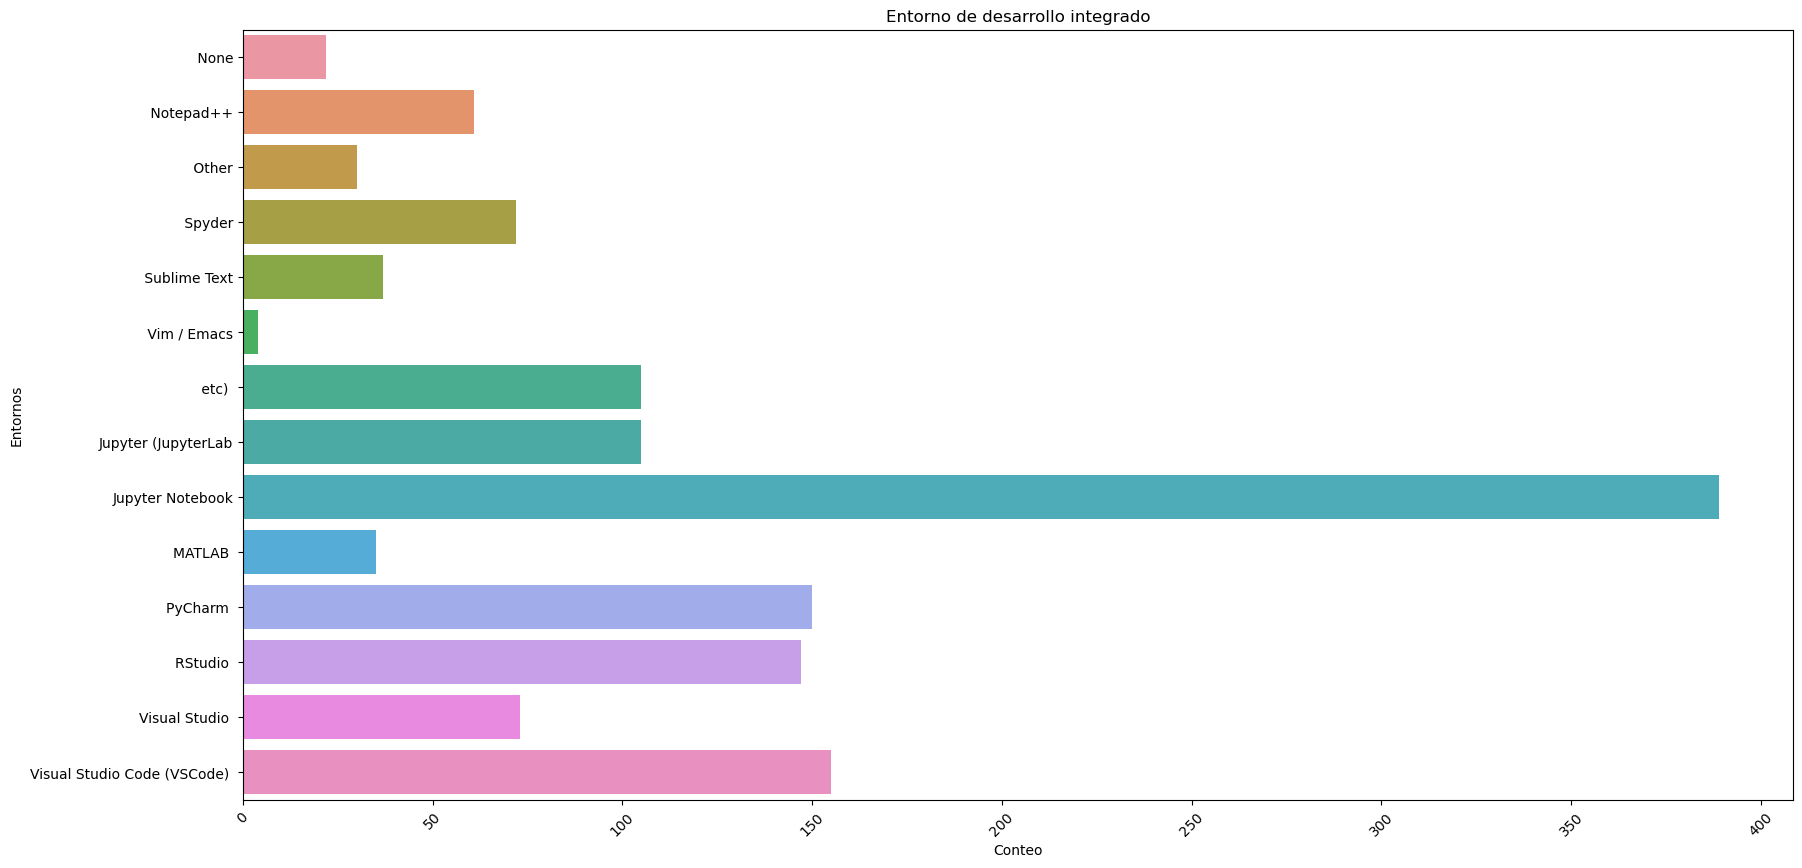

In [452]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q9', data=df_q9)
plt.title('Entorno de desarrollo integrado')
plt.xticks(rotation = 45)
fig.set(ylabel='Entornos', xlabel= 'Conteo')

[Text(0, 0.5, 'Herramienta'), Text(0.5, 0, 'Conteo')]

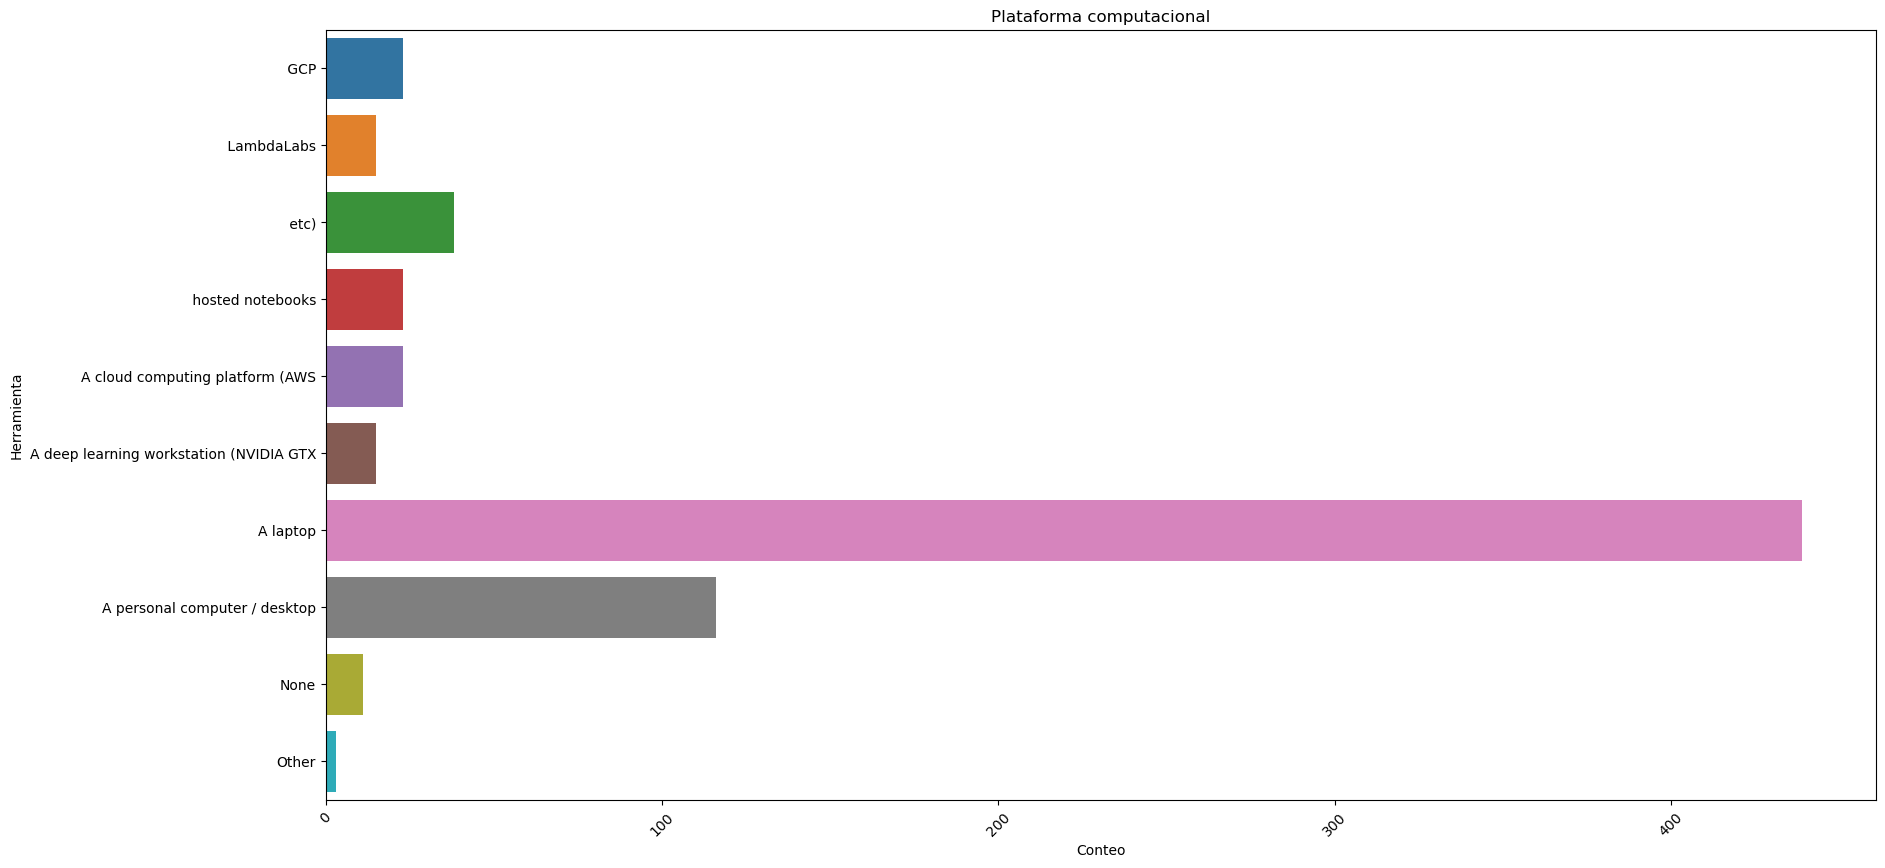

In [468]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q11', data=df_q11)
plt.title('Plataforma computacional')
plt.xticks(rotation = 45)
fig.set(ylabel='Herramienta', xlabel= 'Conteo')